<a href="https://colab.research.google.com/github/nemanja899/Bank-Marketing--Machine-Learning-problem/blob/master/Raiffeisen_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data loading and understanding 

In [ ]:
!pip install dash
!pip install jupyter_dash
!pip install boruta
!pip install mlxtend
!pip install -U imbalanced-learn
!pip install numpy
!pip install pandas
!pip install -U scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install tqdm
!pip install scipy
!pip install xgboost
!pip install lightgbm
#!pip install -r /path/to/requirements.txt

import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt, style
style.use('seaborn-darkgrid')
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
from tqdm import tqdm

import gc
gc.enable()
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


I was doing assingment on google colab please change dir= in order for code to work



In [ ]:
dir="./drive/MyDrive/Raiffizen-task/"
#dir="./"


In [ ]:
df= pd.read_csv(dir+"Retail data.csv",sep=";",parse_dates=['CURRENT_ADDRESS_DATE','CURRENT_JOB_DATE','CURRENT_WITH_BANK_DATE'],infer_datetime_format=True)
pd.options.mode.use_inf_as_na = True
pd.set_option('display.max_columns', 100)

In [ ]:
print(df.columns.tolist())
df.head()

['Cocunut', 'Mortgage_YN', 'AGE_AT_ORIGINATION', 'AGE', 'YEARS_WITH_BANK', 'MARTIAL_STATUS', 'EDUCATION', 'EMPLOYMENT', 'GENDER', 'CUST_INCOME', 'CURRENT_ADDRESS_DATE', 'CURRENT_JOB_DATE', 'CURRENT_WITH_BANK_DATE', 'CURRENT_BALANCE_EUR']


Cocunut Mortgage_YN  AGE_AT_ORIGINATION  AGE  YEARS_WITH_BANK  \
0        1           Y                50.0   52               13   
1        9           Y                48.0   49               11   
2       11           Y                53.0   55               14   
3       12           Y                64.0   66               10   
4       18           Y                46.0   47                9   

  MARTIAL_STATUS EDUCATION EMPLOYMENT GENDER  CUST_INCOME  \
0              M       HGH        PVE      M  909,5013077   
1              M       HGH        SFE      M  288,4615385   
2              M       BCR        STE      M  1280,528692   
3              M       BCR        OTH      F  620,9597692   
4              S       MAS        PVE      F  2239,853846   

  CURRENT_ADDRESS_DATE CURRENT_JOB_DATE CURRENT_WITH_BANK_DATE  \
0           1979-04-18       2010-01-01             2004-03-16   
1           1999-12-16       2004-01-20             2005-11-07   
2           2005-06-28       1990-09-01             2003-06-25   
3           2000-12-22       9999-10-01             2006-12-21   
4           2009-08-01       2013-12-24             2007-08-07   

  CURRENT_BALANCE_EUR  
0         7648,350692  
1         30189,90492  
2         50553,17454  
3         15907,28338  
4         27916,19262

In [ ]:
print(df.shape)
df.info()

(23983, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23983 entries, 0 to 23982
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Cocunut                 23983 non-null  int64         
 1   Mortgage_YN             23983 non-null  object        
 2   AGE_AT_ORIGINATION      306 non-null    float64       
 3   AGE                     23983 non-null  int64         
 4   YEARS_WITH_BANK         23983 non-null  int64         
 5   MARTIAL_STATUS          23983 non-null  object        
 6   EDUCATION               23983 non-null  object        
 7   EMPLOYMENT              23983 non-null  object        
 8   GENDER                  23983 non-null  object        
 9   CUST_INCOME             23983 non-null  object        
 10  CURRENT_ADDRESS_DATE    23983 non-null  object        
 11  CURRENT_JOB_DATE        23983 non-null  object        
 12  CURRENT_WITH_BANK_DATE  23983 non-

In [ ]:
df.isna().sum()

Cocunut                       0
Mortgage_YN                   0
AGE_AT_ORIGINATION        23677
AGE                           0
YEARS_WITH_BANK               0
MARTIAL_STATUS                0
EDUCATION                     0
EMPLOYMENT                    0
GENDER                        0
CUST_INCOME                   0
CURRENT_ADDRESS_DATE          0
CURRENT_JOB_DATE              0
CURRENT_WITH_BANK_DATE        0
CURRENT_BALANCE_EUR           0
dtype: int64

## Transforming data to apropriate column type

In [ ]:
#Functions for data type casting

def change_to_float(dataframe:pd.DataFrame,columns:list):
  """ 
    Function to cast colulmns to float,
    replaces number with comma separation to dot 
    dataframe- DataFrame for column cast
    columns- list of strings with column names
  """
  for col in columns:
    dataframe[col]=dataframe[col].str.replace(",",".")
    dataframe[col]=dataframe[col].astype('float64', errors='raise')

def change_to_datetime(dataframe:pd.DataFrame,columns:list):
  """
    Function to cast columns to date if casting not posible 
    it leaves NaT as a NA in Date format
    dataframe- DataFrame for column cast
    columns- list of strings with column names
  """
  for col in columns:
       dataframe[col]=pd.to_datetime(dataframe[col],errors='coerce')

def chage_to_category(dataframe:pd.DataFrame,columns:list):
  """
    Function to cast columns to category 
    dataframe- DataFrame for column cast
    columns- list of strings with column names
  """
  for col in columns:
    dataframe[col]=dataframe[col].astype("category")

In [ ]:
comma_columns=['CUST_INCOME','CURRENT_BALANCE_EUR']
datetime_columns=['CURRENT_JOB_DATE','CURRENT_WITH_BANK_DATE','CURRENT_ADDRESS_DATE']
categorical_columns=list(set(df.columns)-set(comma_columns)-set(datetime_columns)-set(df.select_dtypes(include=np.number).columns))

df_customers=df.copy()
change_to_float(df_customers,comma_columns)
change_to_datetime(df_customers,datetime_columns)
chage_to_category(df_customers,categorical_columns)

df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23983 entries, 0 to 23982
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Cocunut                 23983 non-null  int64         
 1   Mortgage_YN             23983 non-null  category      
 2   AGE_AT_ORIGINATION      306 non-null    float64       
 3   AGE                     23983 non-null  int64         
 4   YEARS_WITH_BANK         23983 non-null  int64         
 5   MARTIAL_STATUS          23983 non-null  category      
 6   EDUCATION               23983 non-null  category      
 7   EMPLOYMENT              23983 non-null  category      
 8   GENDER                  23983 non-null  category      
 9   CUST_INCOME             23983 non-null  float64       
 10  CURRENT_ADDRESS_DATE    23789 non-null  datetime64[ns]
 11  CURRENT_JOB_DATE        18212 non-null  datetime64[ns]
 12  CURRENT_WITH_BANK_DATE  23983 non-null  dateti

In [ ]:
#if it does not throw an error then Cocnut must be an ID 
#we can set as index or delete it
assert(len(df_customers['Cocunut'].unique())==df_customers.shape[0])
df_customers.rename(columns={'Cocunut':"ID"},inplace=True)
df_customers.set_index("ID",inplace=True)

# EDA

In [ ]:
df_customers.head()

Mortgage_YN  AGE_AT_ORIGINATION  AGE  YEARS_WITH_BANK MARTIAL_STATUS  \
ID                                                                        
1            Y                50.0   52               13              M   
9            Y                48.0   49               11              M   
11           Y                53.0   55               14              M   
12           Y                64.0   66               10              M   
18           Y                46.0   47                9              S   

   EDUCATION EMPLOYMENT GENDER  CUST_INCOME CURRENT_ADDRESS_DATE  \
ID                                                                 
1        HGH        PVE      M   909.501308           1979-04-18   
9        HGH        SFE      M   288.461539           1999-12-16   
11       BCR        STE      M  1280.528692           2005-06-28   
12       BCR        OTH      F   620.959769           2000-12-22   
18       MAS        PVE      F  2239.853846           2009-08-01   

   CURRENT_JOB_DATE CURRENT_WITH_BANK_DATE  CURRENT_BALANCE_EUR  
ID                                                               
1        2010-01-01             2004-03-16          7648.350692  
9        2004-01-20             2005-11-07         30189.904920  
11       1990-09-01             2003-06-25         50553.174540  
12              NaT             2006-12-21         15907.283380  
18       2013-12-24             2007-08-07         27916.192620

## Missing Values and some Feature Engineering

### Infering posible date when data is taken from database

In [ ]:
import datetime
def current_date(row):
 result=row.CURRENT_WITH_BANK_DATE+datetime.timedelta(days=row.YEARS_WITH_BANK*365)
 return result

df_customers['posible_current_date']=df_customers.apply(current_date,axis=1)

In [ ]:
print(df_customers.loc[df_customers['YEARS_WITH_BANK']==0,].sort_values(by=['posible_current_date'],ascending=True).iloc[0,:])
print(df_customers.loc[df_customers['YEARS_WITH_BANK']==1,].sort_values(by=['posible_current_date'],ascending=False).iloc[0,:])

Mortgage_YN                                 N
AGE_AT_ORIGINATION                        NaN
AGE                                        22
YEARS_WITH_BANK                             0
MARTIAL_STATUS                              S
EDUCATION                                 HGH
EMPLOYMENT                                PVE
GENDER                                      M
CUST_INCOME                        169.437231
CURRENT_ADDRESS_DATE      1995-02-03 00:00:00
CURRENT_JOB_DATE          2014-11-18 00:00:00
CURRENT_WITH_BANK_DATE    2016-07-04 00:00:00
CURRENT_BALANCE_EUR                 66.036385
posible_current_date      2016-07-04 00:00:00
Name: 71458, dtype: object
Mortgage_YN                                 N
AGE_AT_ORIGINATION                        NaN
AGE                                        26
YEARS_WITH_BANK                             1
MARTIAL_STATUS                              S
EDUCATION                                 HGH
EMPLOYMENT                                PVE
GENDER 

If we compare two dates above from columns CURRENT_WITH_BANK_DATE 2016-07-02 and 2016-07-04, we can infer date of interest. 

Date when data is taken from DataBase is 2017-07-03.
We can now use that date to calculate new columns of interest. For example "How long is Customer employed or How long does he lives in current apartment".

In [ ]:
current_date=datetime.datetime.strptime('2017-07-03','%Y-%m-%d') #Date when data is taken from DataBase

df_customers['DAYS_IN_APARTMENT']=df_customers['CURRENT_ADDRESS_DATE'].map(lambda x:current_date-x).dt.days
df_customers['DAYS_ON_CURRENT_JOB']=df_customers['CURRENT_JOB_DATE'].map(lambda x:current_date-x).dt.days
df_customers['YEARS_IN_APARTMENT']=round(df_customers['DAYS_IN_APARTMENT']/365,0)
df_customers['YEARS_ON_CURRENT_JOB']=round(df_customers['DAYS_ON_CURRENT_JOB']/365,0)
df_customers.head()

Mortgage_YN  AGE_AT_ORIGINATION  AGE  YEARS_WITH_BANK MARTIAL_STATUS  \
ID                                                                        
1            Y                50.0   52               13              M   
9            Y                48.0   49               11              M   
11           Y                53.0   55               14              M   
12           Y                64.0   66               10              M   
18           Y                46.0   47                9              S   

   EDUCATION EMPLOYMENT GENDER  CUST_INCOME CURRENT_ADDRESS_DATE  \
ID                                                                 
1        HGH        PVE      M   909.501308           1979-04-18   
9        HGH        SFE      M   288.461539           1999-12-16   
11       BCR        STE      M  1280.528692           2005-06-28   
12       BCR        OTH      F   620.959769           2000-12-22   
18       MAS        PVE      F  2239.853846           2009-08-01   

   CURRENT_JOB_DATE CURRENT_WITH_BANK_DATE  CURRENT_BALANCE_EUR  \
ID                                                                
1        2010-01-01             2004-03-16          7648.350692   
9        2004-01-20             2005-11-07         30189.904920   
11       1990-09-01             2003-06-25         50553.174540   
12              NaT             2006-12-21         15907.283380   
18       2013-12-24             2007-08-07         27916.192620   

   posible_current_date  DAYS_IN_APARTMENT  DAYS_ON_CURRENT_JOB  \
ID                                                                
1            2017-03-13            13956.0               2740.0   
9            2016-11-04             6409.0               4913.0   
11           2017-06-21             4388.0               9802.0   
12           2016-12-18             6037.0                  NaN   
18           2016-08-04             2893.0               1287.0   

    YEARS_IN_APARTMENT  YEARS_ON_CURRENT_JOB  
ID                                            
1                 38.0                   8.0  
9                 18.0                  13.0  
11                12.0                  27.0  
12                17.0                   NaN  
18                 8.0                   4.0

### How missing data influences Mortgage

In [ ]:
print(df_customers.isna().sum())


Mortgage_YN                   0
AGE_AT_ORIGINATION        23677
AGE                           0
YEARS_WITH_BANK               0
MARTIAL_STATUS                0
EDUCATION                     0
EMPLOYMENT                    0
GENDER                        0
CUST_INCOME                   0
CURRENT_ADDRESS_DATE        194
CURRENT_JOB_DATE           5771
CURRENT_WITH_BANK_DATE        0
CURRENT_BALANCE_EUR           0
posible_current_date          0
DAYS_IN_APARTMENT           194
DAYS_ON_CURRENT_JOB        5771
YEARS_IN_APARTMENT          194
YEARS_ON_CURRENT_JOB       5771
dtype: int64


Population proportion :0.0128, Population std:0.0007
Features:

feature        took mortgage   missing   mortgage rate       z      p-value
YEARS_IN_APARTMENT :    4 /     194 =     0.021           0.98      0.329
YEARS_ON_CURRENT_JOB :   17 /    5771 =     0.003          -6.64      0.000


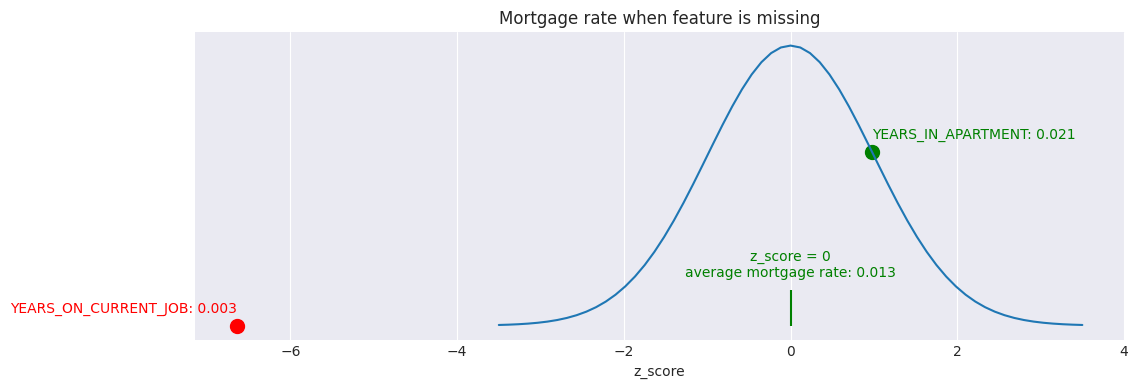

In [ ]:
df_analyze_miss_val=df_customers.loc[:,["YEARS_IN_APARTMENT","YEARS_ON_CURRENT_JOB","Mortgage_YN"]].copy()

df_analyze_miss_val['Mortgage_01']=df_customers.Mortgage_YN.map({"Y":1,"N":0}).astype("int64")

total_mortgage_rate=df_analyze_miss_val['Mortgage_01'].sum()/len(df_analyze_miss_val)
#  bell curve
plt.figure(figsize=(12, 4))
z_ticks = np.linspace(-3.5, 3.5, 61)
pdf = stats.norm.pdf(z_ticks)
plt.plot(z_ticks, pdf)
# Calculate the conditional mortgage rate for every missing feature
# Print the values and plot them
#Distribution of proportion!!!
print(f"Population proportion :{total_mortgage_rate:.4f}, Population std:{np.sqrt(total_mortgage_rate * (1-total_mortgage_rate)/len(df_analyze_miss_val)):.4f}\nFeatures:\n")
print('feature        took mortgage   missing   mortgage rate       z      p-value')
for f in df_analyze_miss_val.columns:
    if df_analyze_miss_val[f].isna().sum() > 0:
        total_missing = df_analyze_miss_val[f].isna().sum()
        took_mortgage = df_analyze_miss_val[df_analyze_miss_val[f].isna()].Mortgage_01.sum()
        z = (took_mortgage / total_missing - total_mortgage_rate) / (np.sqrt(total_mortgage_rate * (1-total_mortgage_rate)) / np.sqrt(total_missing))
        plt.scatter([z], [stats.norm.pdf(z)], c='r' if abs(z) > 2 else 'g', s=100)
        print(f"{f:15} : {took_mortgage:4} /    {total_missing:4} =     {took_mortgage/total_missing:.3f}          {z:5.2f}      {2*stats.norm.cdf(-abs(z)):.3f}")
        plt.annotate(f"{f}: {took_mortgage / total_missing:.3f}",
                                    (z, stats.norm.pdf(z)),
                                    xytext=(0,10), 
                                    textcoords='offset points', ha='left' if z > 0 else 'right',
                                    color='r' if abs(z) > 2 else 'g')
 #if abs(z) > 1: to anotate only relevant features           
# Annotage the center (z=0)
plt.vlines([0], 0, 0.05, color='g')
plt.annotate(f"z_score = 0\naverage mortgage rate: {total_mortgage_rate:.3f}",
                                    (0, 0.05),
                                    xytext=(0,10), 
                                    textcoords='offset points', ha='center',
                                    color='g')
plt.title('Mortgage rate when feature is missing')
plt.yticks([])
plt.xlabel('z_score')
plt.show()

When feature YEARS_ON_CURRENT_JOB (CURRENT_JOB_DATE) is missing we have much lower Morgage rate 0.003 (0.3%) than on average 0.013 (1.3%). That diference is statistically significant, there is very small <0.01% chance we will get that diference with our sampling.  

While feature YEARS_IN_APARTMENT (CURRENT_ADDRESS_DATE) when it is missing does not have statistically significant impact on Morgage rate. Although with slightly incresed rate 2.1%, there is still 33% probability we will get that with our sampling.

In [ ]:
df_customers['YEARS_ON_CURRENT_JOB_MISSING']=df_customers['YEARS_ON_CURRENT_JOB'].isna()

## Category Feature Analysis

### Category value frequencies

In [ ]:
categorical_columns.append('YEARS_ON_CURRENT_JOB_MISSING')
for col in categorical_columns:
  print(f' \nFor column {col} values are:\n')
  print(df_customers[col].value_counts())


 
For column EMPLOYMENT values are:

PVE    10743
STE     6709
RET     6100
SFE      265
OTH      166
Name: EMPLOYMENT, dtype: int64
 
For column GENDER values are:

F    12105
M    11878
Name: GENDER, dtype: int64
 
For column MARTIAL_STATUS values are:

M          17024
S           4223
D           1364
W           1329
*noval*       43
Name: MARTIAL_STATUS, dtype: int64
 
For column EDUCATION values are:

HGH    15987
BCR     6629
PRS      633
SEC      416
MAS      193
PHD      117
PRI        6
OTH        2
Name: EDUCATION, dtype: int64
 
For column Mortgage_YN values are:

N    23677
Y      306
Name: Mortgage_YN, dtype: int64
 
For column YEARS_ON_CURRENT_JOB_MISSING values are:

False    18212
True      5771
Name: YEARS_ON_CURRENT_JOB_MISSING, dtype: int64


### Category pivot tables vs Mortgage

In [ ]:
pd.crosstab(index=df_customers['Mortgage_YN'], columns=[df_customers['MARTIAL_STATUS']], normalize='index', margins=True, margins_name='Total')


MARTIAL_STATUS   *noval*         D         M         S         W
Mortgage_YN                                                     
N               0.001732  0.056933  0.710267  0.175360  0.055708
Y               0.006536  0.052288  0.676471  0.232026  0.032680
Total           0.001793  0.056874  0.709836  0.176083  0.055414

In [ ]:
pd.crosstab(index=df_customers['Mortgage_YN'], columns=[df_customers['EMPLOYMENT']], normalize='index', margins=True, margins_name='Total')


EMPLOYMENT        OTH       PVE       RET       SFE       STE
Mortgage_YN                                                  
N            0.006673  0.445918  0.257296  0.010221  0.279892
Y            0.026144  0.604575  0.026144  0.075163  0.267974
Total        0.006922  0.447942  0.254347  0.011049  0.279740

In [ ]:
pd.crosstab(index=df_customers['Mortgage_YN'], columns=[df_customers['EDUCATION']], normalize='index', margins=True, margins_name='Total')


EDUCATION         BCR       HGH       MAS       OTH       PHD       PRI  \
Mortgage_YN                                                               
N            0.272796  0.671031  0.007349  0.000084  0.004519  0.000253   
Y            0.555556  0.323529  0.062092  0.000000  0.032680  0.000000   
Total        0.276404  0.666597  0.008047  0.000083  0.004878  0.000250   

EDUCATION         PRS       SEC  
Mortgage_YN                      
N            0.026566  0.017401  
Y            0.013072  0.013072  
Total        0.026394  0.017346

In [ ]:
pd.crosstab(index=df_customers['Mortgage_YN'], columns=[df_customers['GENDER']], normalize='index', margins=True, margins_name='Total')
  

GENDER              F         M
Mortgage_YN                    
N            0.505895  0.494105
Y            0.428105  0.571895
Total        0.504902  0.495098

### Category histogram visualization

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def filter_categorical_features(df:pd.DataFrame=None,cat_column:str="",target_cat_column:str="",normalize:bool=False)->tuple:
  """
  Function to filter frequencies for category column vs target category
  returns tuple with frequencies
  """
  result=()
  for target_val in df[target_cat_column].unique():
    if normalize:
       result=result+([df.loc[(df[cat_column]==x) & (df[target_cat_column]==target_val)].shape[0]/df.loc[(df[cat_column]==x)].shape[0]*100
          for x in df[cat_column].unique()],)
    else:
      result=result+([df.loc[(df_customers[cat_column]==x) & (df[target_cat_column]==target_val)].shape[0]
          for x in df[cat_column].unique()],)
  return result


def create_bar_cat_figure_subplots (figure:go.Figure,df:pd.DataFrame,target_cat_column:str,cat_column:str,row,column,group,normalize=False):
  """
  Function to plot category histogram graph

  figure- graph_object.Figure where to draw histogram
  df- DataFrame for data
  target_cat_column- category column with two values
  cat_column-category column to plot frequencies
  row- which row on subplot graph
  column - which column on subplot graph
  group - unique graph number   
  normalize - Option for stacked bars
  """
  names=list(df[target_cat_column].unique())
  x=list(df[cat_column].unique())
  y_axis=list(filter_categorical_features(df,cat_column,target_cat_column,normalize))
  for i,y in enumerate(y_axis):
    if (i+1)%2!=0:
      figure.add_trace(go.Bar(name=names[i],x=x,y=y,offsetgroup=group),row=row,col=column)
    else: 
      figure.add_trace(go.Bar(name=names[i],x=x,y=y,offsetgroup=group,base=y_axis[i-1]),row=row,col=column) 


def create_hist_num_figure_subplots(figure,df,num_column,target_cat_column,row,column,histnorm=None):
  """
  Function to plot numerical distribution
  figure-graph_object.Figure 
  df- DataFrame
  num_column - numerical column string name
  target_cat_column- optional category column to split distribution
  row- row in subplot
  column - column in subplot
  histnorm - histnormes to plot distribution it takes string one of this options:
  'percent', 'probability', 'density', 'probability density'

  """
  if target_cat_column:
    [figure.add_trace(go.Histogram(
      x=df.loc[df[target_cat_column]==name,num_column],
      histnorm=histnorm,
      name=name,
      opacity=0.75),row=row,col=column) for name in df[target_cat_column].unique()]
   
  else :
      figure.add_trace(go.Histogram(
      x=df[num_column],
      histnorm=histnorm,
      opacity=0.75),row=row,col=column)

def create_scatter_figure(df,x_axis,y_axis,cat_color,title,trend):
   """
    Function to plot scatter plots
    df- DataFrame
    x_axis- column name for x_axis
    y_axis - column name for y axis
    cat_color - column name to color by category
    title - title for graph name
    trend- optional show trendilne
   """
   fig=px.scatter(df, x=x_axis, y=y_axis, color=cat_color,trendline = trend, trendline_color_override = "red",title = title)
   return fig


In [ ]:
#Toggle between normalize True or False 

normalize=True


fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Education vs Mortgage", "Gender vs Mortgage", "Employment vs Mortgage", "Martial Status vs Mortgage"))

create_bar_cat_figure_subplots(fig,df_customers,'Mortgage_YN','EDUCATION',1,1,1,normalize)
create_bar_cat_figure_subplots(fig,df_customers,'Mortgage_YN','GENDER',1,2,2,normalize)
create_bar_cat_figure_subplots(fig,df_customers,'Mortgage_YN','EMPLOYMENT',2,1,3,normalize)
create_bar_cat_figure_subplots(fig,df_customers,'Mortgage_YN','MARTIAL_STATUS',2,2,4,normalize)


fig.update_layout(height=600, width=1200,
                  title_text="Categories vs Mortgage Distribution")

fig.show()



## Numerical columns analysis

### Descriptive Statistics

In [ ]:
df_customers.describe()

AGE_AT_ORIGINATION           AGE  YEARS_WITH_BANK   CUST_INCOME  \
count          306.000000  23983.000000     23983.000000  23983.000000   
mean            41.333333     49.004378         7.370804    381.512485   
std              8.970992     12.976205         4.320568    486.255438   
min             22.000000     20.000000         0.000000      0.000000   
25%             35.000000     39.000000         3.000000    212.304538   
50%             40.000000     49.000000         9.000000    287.355692   
75%             47.750000     60.000000        11.000000    406.100269   
max             64.000000     92.000000        40.000000  25741.920000   

       CURRENT_BALANCE_EUR  DAYS_IN_APARTMENT  DAYS_ON_CURRENT_JOB  \
count         23983.000000       23789.000000         18212.000000   
mean           1960.854473        9368.111102          4287.861081   
std            5023.234656        5970.232063          3315.853895   
min               0.000000      -11854.000000           274.000000   
25%             107.677577        4262.000000          1630.000000   
50%             428.067000        8737.000000          3458.000000   
75%            2307.692308       13516.000000          5972.250000   
max          187940.645500       33693.000000         17330.000000   

       YEARS_IN_APARTMENT  YEARS_ON_CURRENT_JOB  
count        23789.000000          18212.000000  
mean            25.776115             11.777125  
std             16.339393              9.086876  
min            -32.000000              1.000000  
25%             12.000000              4.000000  
50%             24.000000              9.000000  
75%             37.000000             16.000000  
max             92.000000             47.000000

### Removing incorect data and Necessary columns

We can see from above , there are negative days in apartment which seems imposible. We better examine this more.

In [ ]:
print(len(df_customers.loc[df_customers['DAYS_IN_APARTMENT']<0,:]))
df_customers.loc[df_customers['DAYS_IN_APARTMENT']<0,:]

14


Mortgage_YN  AGE_AT_ORIGINATION  AGE  YEARS_WITH_BANK MARTIAL_STATUS  \
ID                                                                           
2470            N                 NaN   70               13              M   
10483           N                 NaN   68               10              M   
12880           N                 NaN   68               15              M   
21600           N                 NaN   69                9              M   
22460           N                 NaN   68                3              M   
25788           N                 NaN   69                8              M   
25789           N                 NaN   79                2              W   
29062           N                 NaN   71                2              S   
36289           N                 NaN   68                2              W   
46465           N                 NaN   71                2              S   
60154           N                 NaN   70                1              M   
65625           N                 NaN   69                1              M   
72701           N                 NaN   68                5              M   
76981           N                 NaN   68                0              M   

      EDUCATION EMPLOYMENT GENDER  CUST_INCOME CURRENT_ADDRESS_DATE  \
ID                                                                    
2470        BCR        RET      M   270.210231           2047-03-21   
10483       HGH        RET      M   233.961615           2049-08-12   
12880       BCR        RET      F   172.091154           2049-12-03   
21600       HGH        RET      M   217.663923           2048-03-14   
22460       BCR        RET      M   292.307692           2049-11-16   
25788       HGH        RET      M   127.115692           2048-05-28   
25789       HGH        RET      M   165.538308           2038-12-08   
29062       HGH        RET      F   224.596462           2046-09-03   
36289       HGH        RET      M   143.476539           2049-11-29   
46465       HGH        RET      F   224.596462           2046-09-03   
60154       HGH        RET      M   208.751692           2047-03-01   
65625       HGH        RET      M   189.537846           2048-11-13   
72701       HGH        RET      M   215.456154           2049-12-16   
76981       HGH        RET      M   210.718461           2049-10-21   

      CURRENT_JOB_DATE CURRENT_WITH_BANK_DATE  CURRENT_BALANCE_EUR  \
ID                                                                   
2470               NaT             2004-06-24             0.000000   
10483              NaT             2006-12-20            75.050615   
12880              NaT             2001-12-07            88.657923   
21600              NaT             2008-04-21           215.324462   
22460              NaT             2014-01-23            64.823000   
25788              NaT             2009-06-16           100.961077   
25789              NaT             2014-12-17           160.508154   
29062              NaT             2014-12-17           202.387231   
36289              NaT             2015-04-22           143.275539   
46465              NaT             2014-12-17           458.122769   
60154              NaT             2016-05-05          2393.436462   
65625              NaT             2016-06-14          3850.296077   
72701              NaT             2012-02-10          1554.349538   
76981              NaT             2016-09-13          3524.831077   

      posible_current_date  DAYS_IN_APARTMENT  DAYS_ON_CURRENT_JOB  \
ID                                                                   
2470            2017-06-21           -10853.0                  NaN   
10483           2016-12-17           -11728.0                  NaN   
12880           2016-12-03           -11841.0                  NaN   
21600           2017-04-19           -11212.0                  NaN   
22460           2017-01-22           -11824.0                  NaN   
25788    

There are 2040th years in column 'CURRENT_ADDRESS_DATE' , customers are all Retired and did not took mortgage. We will remove them from further analysis. 'AGE_AT_ORIGINATION' is type of data leakege and should be removed from any modeling, columns that are also removed are CURRENT_JOB_DATE , CURRENT_WITH_BANK_DATE and posible_current_date. 

If Customer is retired are all data in YEARS_ON_CURRENT_JOB   NA's, if that's correct does that mean NA's are actually unemployed?

In [ ]:
df_customers.drop(index=df_customers.loc[df_customers['DAYS_IN_APARTMENT']<0,:].index,inplace=True)
df_customers.drop(columns=['CURRENT_ADDRESS_DATE','CURRENT_JOB_DATE','CURRENT_WITH_BANK_DATE','posible_current_date'],inplace=True)
df_customers.loc[(df_customers.EMPLOYMENT=="RET") & (df_customers.YEARS_ON_CURRENT_JOB.notna()),:]

Mortgage_YN  AGE_AT_ORIGINATION  AGE  YEARS_WITH_BANK MARTIAL_STATUS  \
ID                                                                           
549             Y                62.0   64               13              M   
2556            N                 NaN   66               12              D   
3313            N                 NaN   62               12              M   
3593            N                 NaN   70               12              M   
3890            N                 NaN   70               12              W   
...           ...                 ...  ...              ...            ...   
79378           N                 NaN   42                0              M   
79478           N                 NaN   56                1              D   
79504           N                 NaN   70               13              W   
79576           N                 NaN   68                4              M   
79774           N                 NaN   67                1              M   

      EDUCATION EMPLOYMENT GENDER  CUST_INCOME  CURRENT_BALANCE_EUR  \
ID                                                                    
549         HGH        RET      M   264.967769          5684.797923   
2556        HGH        RET      F   217.539538             0.918692   
3313        BCR        RET      M   286.220846           279.495000   
3593        HGH        RET      M   276.078462           253.954000   
3890        HGH        RET      F   304.066154             2.433538   
...         ...        ...    ...          ...                  ...   
79378       BCR        RET      M   245.923077           255.923077   
79478       HGH        RET      F   200.000000           322.405615   
79504       BCR        RET      F   315.544615          2468.560308   
79576       BCR        RET      F  1381.260308          2361.048615   
79774       HGH        RET      M   304.159462          5358.807692   

       DAYS_IN_APARTMENT  DAYS_ON_CURRENT_JOB  YEARS_IN_APARTMENT  \
ID                                                                  
549               4662.0               4566.0                13.0   
2556             13212.0               4081.0                36.0   
3313             21003.0               1401.0                58.0   
3593             13698.0               5511.0                38.0   
3890             12967.0               5481.0                36.0   
...                  ...                  ...                 ...   
79378            15280.0               5721.0                42.0   
79478            20587.0               5978.0                56.0   
79504            11506.0               4566.0                32.0   
79576            12967.0               7161.0                36.0   
79774              733.0               5792.0                 2.0   

       YEARS_ON_CURRENT_JOB  YEARS_ON_CURRENT_JOB_MISSING  
ID                                                         
549                    13.0                         False  
2556                   11.0                         False  
3313                    4.0                         False  
3593                   15.0                         False  
3890                   15.0                         False  
...                     ...                           ...  
79378                  16.0                         False  
79478                  16.0                         False  
79504                  13.0                         False  
79576                  20.0                         False  
79774                  16.0                         False  

[731 rows x 15 columns]

### Interactive Numerical Distributions

In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go
from jupyter_dash import JupyterDash


def dash_num_distributions(df,categorical_columns,port):
  histnorms=["",'percent', 'probability', 'density', 'probability density']
  app = JupyterDash(__name__)

  app.layout = html.Div([
      html.Div([ html.Div(children='Choose histogram norms',style={"fontWeight":"400",'width': '20%','background':"white" ,'display': 'inline-block'}),
              html.Div(children='Choose category column to compare',style={"fontWeight":"400",'width': '20%','background':"white", 'display': 'inline-block'})]),
      html.Div([
      dcc.Dropdown(
          id="dropdown1",
          options=histnorms,
          value=None,
          clearable=False,
          searchable=True,
      )],style={'width': '20%', 'display': 'inline-block'}),
      html.Div([dcc.Dropdown(
          id="dropdown2",
          options=categorical_columns+[None],
          value=None,
          clearable=False,
          searchable=True,
      )],style={'width': '20%', 'display': 'inline-block'}), 
      dcc.Graph(id="graph")])

  @app.callback(
    Output("graph", "figure"), 
    Input("dropdown1", "value"),
    Input("dropdown2","value"))
  def histnorm_options(histnorm,target):
    fig = make_subplots(
      rows=6, cols=1,
      subplot_titles=(f"Age Distribution vs {target}", f"YEARS WITH BANK Distribution vs {target}",
                      f"CURRENT BALANCE Distribution vs {target}", f"CUSTOMER INCOME Distribution vs {target}",
                      f"YEARS_IN_APARTMENT Distribution vs {target}",f"YEARS_ON_CURRENT_JOB Distribution vs {target}"
                      ))

    create_hist_num_figure_subplots(fig,df,'AGE',target,1,1,histnorm)
    create_hist_num_figure_subplots(fig,df,'YEARS_WITH_BANK',target,2,1,histnorm)
    create_hist_num_figure_subplots(fig,df,'CURRENT_BALANCE_EUR',target,3,1,histnorm)
    create_hist_num_figure_subplots(fig,df,'CUST_INCOME',target,4,1,histnorm)
    create_hist_num_figure_subplots(fig,df,'YEARS_IN_APARTMENT',target,5,1,histnorm)
    create_hist_num_figure_subplots(fig,df,'YEARS_ON_CURRENT_JOB',target,6,1,histnorm)

    fig.update_layout(height=2000, width=900,
      title=f'Numerical Distribution vs {target}',
      hovermode="x")
    return fig




  app.run_server(mode='inline',host="0.0.0.0",port=port)


In [ ]:
dash_num_distributions(df_customers,categorical_columns,5001)

Dash is running on http://0.0.0.0:5001/



INFO:dash.dash:Dash is running on http://0.0.0.0:5001/



<IPython.core.display.Javascript object>

One thing about distribution YEARS IN APARTMENT or CURRENT_ADDRESS_DATE , it does look like more positive examples are grouped at the beginning. So we have to pinpoint date when did a customer took mortgage to compare it with years in apartment. Maybe customer took mortgage and moved in new apartment? And that is why YEARS IN APARTMENT is lower perhaps?

<Axes: >

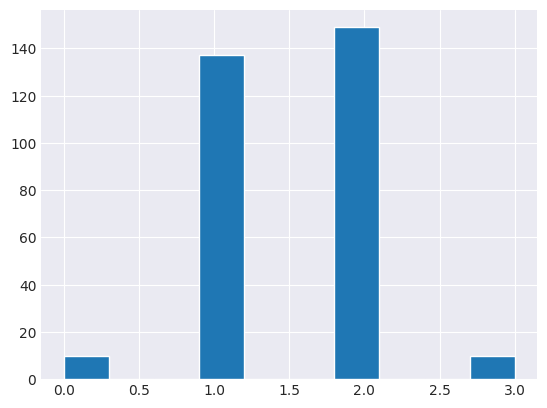

In [ ]:
when_mortgage=df_customers.loc[df_customers['AGE_AT_ORIGINATION'].notna(),'AGE']-df_customers.loc[df_customers['AGE_AT_ORIGINATION'].notna(),'AGE_AT_ORIGINATION']
when_mortgage.hist()

From distribution above we can conclude data is captured from late 2014 till when data is taken from DB 2017-7-3 !!!

In [ ]:
print(when_mortgage)
print(df_customers.loc[df_customers['AGE_AT_ORIGINATION'].notna(),"YEARS_IN_APARTMENT"])
df_customers.drop(columns=['AGE_AT_ORIGINATION'],inplace=True)

ID
1       2.0
9       1.0
11      2.0
12      2.0
18      1.0
       ... 
1018    0.0
1019    1.0
1020    1.0
1021    1.0
1022    1.0
Length: 306, dtype: float64
ID
1       38.0
9       18.0
11      12.0
12      17.0
18       8.0
        ... 
1018     5.0
1019     5.0
1020    16.0
1021    31.0
1022    16.0
Name: YEARS_IN_APARTMENT, Length: 306, dtype: float64


luckily with ID we can compare same data points and get final conclusion that CURRENT_ADRESS_DATE or YEARS_IN_APARTMENT is not newly entered when customer took mortgage. That means we can use that column in our models.

### Interactive Scatter plots

In [ ]:
def dash_scatter_graph(df,categorical_columns,port):
  """
  Function to Plot dash interactive scatter plots
  df- DataFrame for data
  categorical_columns - colums for color separation
  port- unique port to show dashboard
  """
  trendlines=['ols', 'lowess', 'rolling', 'expanding','ewm']

  app = JupyterDash(__name__)

  app.layout = html.Div([
      html.Table(children=[html.Thead(children=[
                            html.Tr(children=[
                              html.Th(children='Plot diferenet colors by categories',style={'width': '20%'}),
                              html.Th(children='Show diferent trendlines',style={'width': '20%'}),
                              html.Th(children='Pick x-axis values',style={'width': '20%'}),
                              html.Th(children='Pick y-axis values',style={'width': '20%'})],
                              style={'background':"white","width":"80%","padding":"3px","box-sizing":"border-box"})]
                              ),
                          html.Tbody(children=[
                            html.Tr(children=[
                              html.Td(children=[dcc.Dropdown(
                                      id="dropdown1",
                                      options=categorical_columns+[""],
                                      value=None,
                                      clearable=True,
                                      searchable=True,)]),
                              html.Td(children=[dcc.Dropdown(
                                      id="dropdown2",
                                      options=trendlines+[""],
                                      value=None,
                                      clearable=True,
                                      searchable=True,)]), 
                              html.Td(children=[dcc.Dropdown(
                                      id="dropdown3",
                                      options=df.select_dtypes(include="number").columns.tolist(),
                                      value="AGE",
                                      clearable=False,
                                      searchable=True)]),
                              html.Td(children=[dcc.Dropdown(
                                      id="dropdown4",
                                      options=df.select_dtypes(include="number").columns.tolist(),
                                      value='YEARS_WITH_BANK',
                                      clearable=False,
                                      searchable=True)])
                            ])
                          ])
                      ],style={"border-collapse": "collapse","background":"white"}), 
      dcc.Graph(id="graph")])

  @app.callback(
    Output("graph", "figure"), 
    Input("dropdown1", "value"),
    Input("dropdown2", "value"),
    Input("dropdown3","value"),
    Input("dropdown4","value"))
  def scatter_options(category,tredline,num1,num2):

    fig=create_scatter_figure(df,num1,num2,category,f"Scatter plot {num1} vs {num2}",tredline)
    return fig

  app.run_server(mode='inline',host="0.0.0.0",port=port)

In [ ]:
dash_scatter_graph(df_customers,categorical_columns,5002)

Dash is running on http://0.0.0.0:5002/



INFO:dash.dash:Dash is running on http://0.0.0.0:5002/



<IPython.core.display.Javascript object>

If we plot Customer Income vs any other num column based on Mortgage, we could clearly see some separations in data which we couldn't in distributions plot. Reason is it's realy hard to spot vs positive mortgage distribusion,  because of smaller data quantities.

### Correlations

<ipython-input-39-e0911e125c67>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



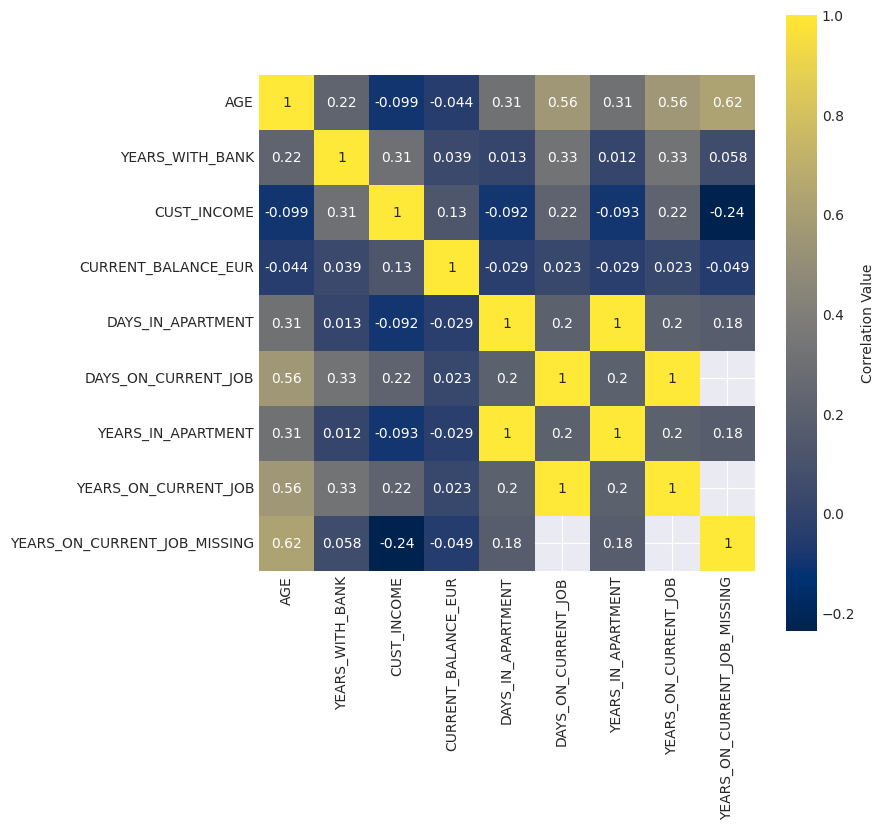

In [ ]:
corrmat = df_customers.corr(method="spearman")
plt.subplots(figsize = (8, 8))
sns.heatmap(corrmat,cmap = "cividis",annot = True, square = True, cbar_kws = {'label': 'Correlation Value', 'orientation': 'vertical'});

In [ ]:
df_customers.drop(columns=["DAYS_ON_CURRENT_JOB","DAYS_IN_APARTMENT"],inplace=True)

In [ ]:
df_customers.head()

Mortgage_YN  AGE  YEARS_WITH_BANK MARTIAL_STATUS EDUCATION EMPLOYMENT  \
ID                                                                         
1            Y   52               13              M       HGH        PVE   
9            Y   49               11              M       HGH        SFE   
11           Y   55               14              M       BCR        STE   
12           Y   66               10              M       BCR        OTH   
18           Y   47                9              S       MAS        PVE   

   GENDER  CUST_INCOME  CURRENT_BALANCE_EUR  YEARS_IN_APARTMENT  \
ID                                                                
1       M   909.501308          7648.350692                38.0   
9       M   288.461539         30189.904920                18.0   
11      M  1280.528692         50553.174540                12.0   
12      F   620.959769         15907.283380                17.0   
18      F  2239.853846         27916.192620                 8.0   

    YEARS_ON_CURRENT_JOB  YEARS_ON_CURRENT_JOB_MISSING  
ID                                                      
1                    8.0                         False  
9                   13.0                         False  
11                  27.0                         False  
12                   NaN                          True  
18                   4.0                         False

# Modeling

##Spliting data set into Train and Test

Pictures of SMOTE,ADASYN,SMOTE + Tomek, SMOTE+ ENN oversampling techniques

<div style="background:white"><img src="https://editor.analyticsvidhya.com/uploads/19616image7.png" style="width:100%;" /></div>



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from imblearn.pipeline import Pipeline
from imblearn import FunctionSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTEN
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

def transformer_func(X):
  discret=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='uniform')
  x_notna=X.loc[X['YEARS_ON_CURRENT_JOB'].notna(),['YEARS_ON_CURRENT_JOB']] 
  X.loc[X['YEARS_ON_CURRENT_JOB'].notna(),['YEARS_ON_CURRENT_JOB']]=discret.fit_transform(x_notna)
  X.loc[X['YEARS_ON_CURRENT_JOB'].isna(),['YEARS_ON_CURRENT_JOB']]="missing"
  return X

func=FunctionTransformer(transformer_func,check_inverse=False)

df_notna=func.fit_transform(df_customers.copy()).dropna()

X=df_notna.drop(columns=['Mortgage_YN','YEARS_ON_CURRENT_JOB_MISSING'])

Y=df_notna.loc[:,['Mortgage_YN']]
Y['Mortgage_YN']=Y['Mortgage_YN'].map({"N":0,"Y":1}).astype("int16")

X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size = 0.3, random_state = 79, stratify = Y)

In [ ]:
print(Y_train.value_counts(normalize=True))
print(Y_test.value_counts(normalize=True))

Mortgage_YN
0              0.987321
1              0.012679
dtype: float64
Mortgage_YN
0              0.987242
1              0.012758
dtype: float64


Same proportion on train and test sets

In [ ]:
X_train.isna().sum()

AGE                     0
YEARS_WITH_BANK         0
MARTIAL_STATUS          0
EDUCATION               0
EMPLOYMENT              0
GENDER                  0
CUST_INCOME             0
CURRENT_BALANCE_EUR     0
YEARS_IN_APARTMENT      0
YEARS_ON_CURRENT_JOB    0
dtype: int64

No more missing values we are ready to build a model

## Boruta Feature importance before and after Oversampling

In [ ]:
def print_boruta_feature_importance(X,Y,oversampling:str=None,estimator=None,all_numeric=False):
  if not estimator:
    estimator = RandomForestClassifier(
      n_jobs = -1, 
      max_depth = 7,
      min_samples_leaf=10
    )

  #for decision threes and random forest we don't realy need to scale numerical features or normalize them
  #We can either put column YEARS_ON_CURRENT_JOB_MISSING in  a model and delete num column YEARS_ON_CURRENT_JOB or
  #discretize num column and put one category value if it's missing.

 

  boruta = BorutaPy(
    estimator = estimator, 
    n_estimators = 'auto',
    max_iter = 1000 # number of trials to perform
  )
  #fit Boruta (it accepts np.array, not pd.DataFrame)
  df_onehot=None
  if all_numeric:
    df_onehot=X.copy()
  else:
    df_onehot=pd.get_dummies(X,columns=X.select_dtypes(exclude="number").columns)

  boruta.fit(np.array(df_onehot), np.array(Y).ravel())
  green_area = df_onehot.columns[boruta.support_].to_list()
  blue_area = df_onehot.columns[boruta.support_weak_].to_list()

  print(f"\nFeature importance for {oversampling} Oversampling:") if oversampling else print("No oversampling:")
  print('features in the green area:', green_area)
  print('features in the blue area:', blue_area)
  print('Rank:\n',pd.Series(boruta.ranking_,name="rank",index=df_onehot.columns).sort_values())


Feature importances before oversampling

In [ ]:
print_boruta_feature_importance(X_train,Y_train)

No oversampling:
features in the green area: ['CUST_INCOME', 'CURRENT_BALANCE_EUR', 'YEARS_IN_APARTMENT']
features in the blue area: []
Rank:
 CUST_INCOME                      1
CURRENT_BALANCE_EUR              1
YEARS_IN_APARTMENT               1
AGE                              2
YEARS_WITH_BANK                  3
EMPLOYMENT_SFE                   4
EDUCATION_HGH                    5
EDUCATION_MAS                    6
EDUCATION_BCR                    7
EDUCATION_PHD                    8
EMPLOYMENT_RET                   9
EMPLOYMENT_PVE                   9
GENDER_M                        11
YEARS_ON_CURRENT_JOB_1.0        12
GENDER_F                        12
YEARS_ON_CURRENT_JOB_0.0        14
YEARS_ON_CURRENT_JOB_missing    14
EMPLOYMENT_STE                  16
MARTIAL_STATUS_M                17
MARTIAL_STATUS_S                18
EMPLOYMENT_OTH                  19
MARTIAL_STATUS_W                20
YEARS_ON_CURRENT_JOB_2.0        21
MARTIAL_STATUS_D                22
EDUCATION_SEC    

Feature importances after oversampling

Optional to remove outliers for smote, some techiques uses KNN and SVT algoritham and these models are sensitive to outliers. But if we remove outliers it will remove a lot of positive data points.

In [ ]:
def CustomSampler_IQR (X, y):
    
    features = X.columns
    df = X.copy()
    df['Outcome'] = y
    
    indices = [x for x in df.index]    
    out_indexlist = []
        
    for col in features:
       
        #Using nanpercentile instead of percentile because of nan values
        Q1 = np.nanpercentile(df[col], 25.)
        Q3 = np.nanpercentile(df[col], 75.)
        
        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
        outliers_index = df[col][(df[col] < lower) | (df[col] > upper)].index.tolist()
        outliers = df[col][(df[col] < lower) | (df[col] > upper)].values        
        out_indexlist.extend(outliers_index)
        
    #using set to remove duplicates
    out_indexlist = list(set(out_indexlist))
    
    clean_data = np.setdiff1d(indices,out_indexlist)

    return X.loc[clean_data], y.loc[clean_data]
                

In [ ]:
smote=SMOTE(random_state=69)
#svmsmote=SVMSMOTE(random_state=69)
smoteenc=SMOTENC(categorical_features=list(range(5,31)), random_state=69)
bordSmote=BorderlineSMOTE(random_state=69)
ada=ADASYN(random_state=69)
tomek=SMOTETomek(random_state=69)
een=SMOTEENN(random_state=69)
over_samp=[smote,smoteenc,bordSmote,ada,tomek,een]
over_samp_names=["SMOTE","SMOTENC","BorderSMOTE","ADASYN","SMOTETomek","SMOTEENN"]

df_dummies=pd.get_dummies(X_train,columns=X.select_dtypes(exclude="number").columns)

for i,sampl in enumerate(over_samp):
  x_sampl,y_sampl=sampl.fit_resample(df_dummies,Y_train)
  print_boruta_feature_importance(x_sampl,y_sampl,over_samp_names[i],all_numeric=True)



Feature importance for SMOTE Oversampling:
features in the green area: ['AGE', 'YEARS_WITH_BANK', 'CUST_INCOME', 'CURRENT_BALANCE_EUR', 'YEARS_IN_APARTMENT', 'MARTIAL_STATUS_D', 'MARTIAL_STATUS_M', 'MARTIAL_STATUS_S', 'MARTIAL_STATUS_W', 'EDUCATION_BCR', 'EDUCATION_HGH', 'EDUCATION_PRS', 'EDUCATION_SEC', 'EMPLOYMENT_PVE', 'EMPLOYMENT_RET', 'EMPLOYMENT_STE', 'GENDER_F', 'GENDER_M', 'YEARS_ON_CURRENT_JOB_0.0', 'YEARS_ON_CURRENT_JOB_1.0', 'YEARS_ON_CURRENT_JOB_2.0', 'YEARS_ON_CURRENT_JOB_3.0', 'YEARS_ON_CURRENT_JOB_missing']
features in the blue area: []
Rank:
 AGE                             1
YEARS_ON_CURRENT_JOB_3.0        1
YEARS_ON_CURRENT_JOB_2.0        1
YEARS_ON_CURRENT_JOB_1.0        1
YEARS_ON_CURRENT_JOB_0.0        1
GENDER_M                        1
GENDER_F                        1
EMPLOYMENT_STE                  1
EMPLOYMENT_RET                  1
EMPLOYMENT_PVE                  1
EDUCATION_SEC                   1
EDUCATION_PRS                   1
YEARS_ON_CURRENT_JOB_missi

## RidgeClasifier

###### Without Oversampling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

def print_metrics_tresholds(X,y,model):
  columns_val=["precision_score","recall_score","accuracy_score","f1_score"]
  eval_limit=[]
  for i in range(1,10,1):
    y_hat = model.predict_proba(X)[:, 1] >= i/10
    eval_limit.append(precision_score(y, y_hat))
    eval_limit.append(recall_score(y, y_hat))
    eval_limit.append(accuracy_score(y, y_hat))
    eval_limit.append(f1_score(y, y_hat))

  eval_limit=np.asarray(eval_limit)
  eval_limit=eval_limit.reshape(-1,4)
  limit=["0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9"]
  eval_limit=pd.DataFrame(eval_limit,columns=columns_val,index=limit)
  print(eval_limit)

def plot_conf_matrix(model,X,y):
    y_hat=model.predict(X)
    mat = confusion_matrix(y, y_hat)
    plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

In [ ]:


X_train.YEARS_ON_CURRENT_JOB=X_train.YEARS_ON_CURRENT_JOB.astype("str")
X_test.YEARS_ON_CURRENT_JOB=X_test.YEARS_ON_CURRENT_JOB.astype("str")
ridge=LogisticRegression(penalty='l2')
cat_col=list(X_train.select_dtypes(exclude="number").columns)
col_trans=ColumnTransformer(transformers=[("one_hot",OneHotEncoder(handle_unknown='ignore'),cat_col)]
                             ,remainder="passthrough")
ridge_pipe=Pipeline(steps=[("col_trans",col_trans),("scaler",StandardScaler()),("ridge", ridge)])

ridge_pipe.fit( X_train, Y_train.values.ravel())
results_lg = cross_val_score(ridge_pipe, X_train, Y_train.values.ravel(), cv=10, scoring='f1',error_score="raise")
f'f1 is {round(np.mean(results_lg) * 100, 2)}% +/- {round(np.std(results_lg)*100, 2)}%'



'f1 is 88.35% +/- 4.57%'

In [ ]:
ridge_pipe

Pipeline(steps=[('col_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MARTIAL_STATUS',
                                                   'EDUCATION', 'EMPLOYMENT',
                                                   'GENDER',
                                                   'YEARS_ON_CURRENT_JOB'])])),
                ('scaler', StandardScaler()), ('ridge', LogisticRegression())])

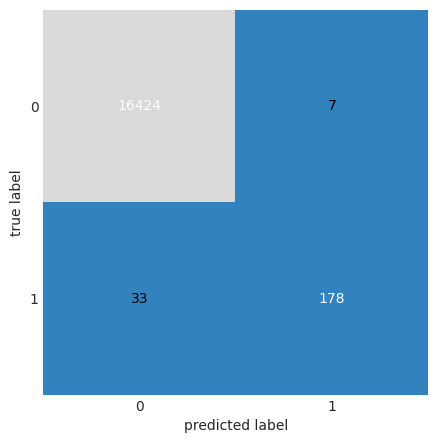

In [ ]:
plot_conf_matrix(ridge_pipe,X_train,Y_train)

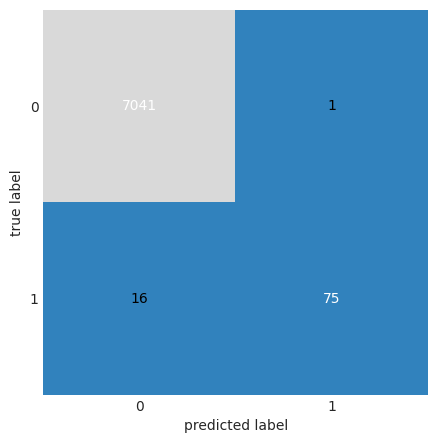

In [ ]:
plot_conf_matrix(ridge_pipe,X_test,Y_test)

In [ ]:
print("Trening dataset:\n")
print_metrics_tresholds(X_train,Y_train,ridge_pipe)
print("\nTest dataset:\n")
print_metrics_tresholds(X_test,Y_test,ridge_pipe)

Trening dataset:

     precision_score  recall_score  accuracy_score  f1_score
0.1         0.794979      0.900474        0.995794  0.844444
0.2         0.894737      0.886256        0.997236  0.890476
0.3         0.920398      0.876777        0.997476  0.898058
0.4         0.952128      0.848341        0.997536  0.897243
0.5         0.962162      0.843602        0.997596  0.898990
0.6         0.983333      0.838863        0.997777  0.905371
0.7         0.988701      0.829384        0.997717  0.902062
0.8         0.988304      0.800948        0.997356  0.884817
0.9         0.993902      0.772512        0.997056  0.869333

Test dataset:

     precision_score  recall_score  accuracy_score  f1_score
0.1         0.774510      0.868132        0.995093  0.818653
0.2         0.887640      0.868132        0.996916  0.877778
0.3         0.939759      0.857143        0.997477  0.896552
0.4         0.974359      0.835165        0.997617  0.899408
0.5         0.986842      0.824176        0.997617 

It does seem that model is predicting quite well even with highly imbalanced dataset.
Because of that maybe oversampling is not needed, but we will try one nonetheless and see if model slighly improves.


### With Oversampling


SMOTE

f1 is 51.35% +/- 3.12%



(<Figure size 500x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

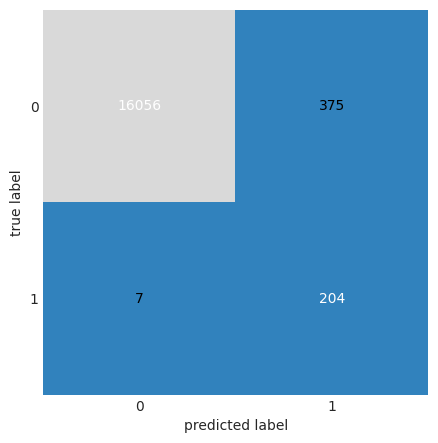

In [ ]:
ridge_over_pipe=Pipeline(steps=[("col_trans",col_trans),("smote",SMOTE(random_state=69)),("scaler",StandardScaler()),("ridge",ridge)])
ridge_over_pipe.fit( X_train, Y_train.values.ravel())

results_lg = cross_val_score(ridge_over_pipe, X_train, Y_train.values.ravel(), cv=10, scoring='f1',error_score="raise")
print(f'f1 is {round(np.mean(results_lg) * 100, 2)}% +/- {round(np.std(results_lg)*100, 2)}%\n')

y_hat=ridge_over_pipe.predict(X_train)
mat = confusion_matrix(Y_train, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

(<Figure size 500x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

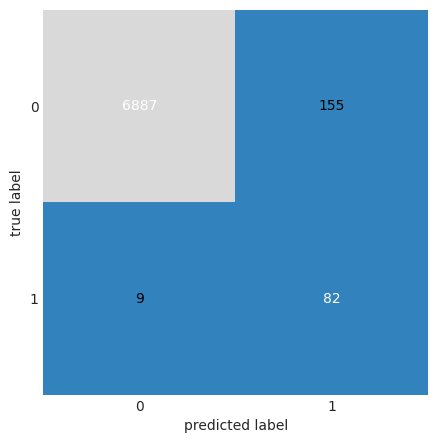

In [ ]:
y_hat=ridge_over_pipe.predict(X_test)
mat = confusion_matrix(Y_test, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

In [ ]:
print("Trening dataset:\n")
print_metrics_tresholds(X_train,Y_train,ridge_over_pipe)
print("\nTest dataset:\n")
print_metrics_tresholds(X_test,Y_test,ridge_over_pipe)

Trening dataset:

     precision_score  recall_score  accuracy_score  f1_score
0.1         0.132530      0.990521        0.917678  0.233781
0.2         0.200772      0.985782        0.950066  0.333601
0.3         0.255240      0.981043        0.963466  0.405088
0.4         0.306428      0.971564        0.971758  0.465909
0.5         0.352332      0.966825        0.977046  0.516456
0.6         0.404762      0.966825        0.981553  0.570629
0.7         0.468677      0.957346        0.985699  0.629283
0.8         0.564470      0.933649        0.990025  0.703571
0.9         0.675000      0.895735        0.993210  0.769857

Test dataset:

     precision_score  recall_score  accuracy_score  f1_score
0.1         0.129851      0.956044        0.917706  0.228647
0.2         0.194896      0.923077        0.950372  0.321839
0.3         0.246334      0.923077        0.962989  0.388889
0.4         0.287719      0.901099        0.970279  0.436170
0.5         0.345992      0.901099        0.977008 

Let's try different overampling techniques maybe we can achive better performance.

BorderlineSMOTE

f1 is 65.07% +/- 4.53%



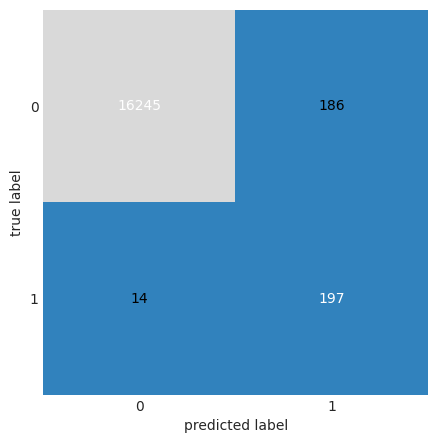

In [ ]:
   
ridge_over_pipe_br=Pipeline(steps=[("col_trans",col_trans),("smote",BorderlineSMOTE(random_state=69)),("scaler",StandardScaler()),("ridge",ridge)])
ridge_over_pipe_br.fit( X_train, Y_train.values.ravel())

results_lg = cross_val_score(ridge_over_pipe_br, X_train, Y_train.values.ravel(), cv=10, scoring='f1',error_score="raise")
print(f'f1 is {round(np.mean(results_lg) * 100, 2)}% +/- {round(np.std(results_lg)*100, 2)}%\n')

plot_conf_matrix(ridge_over_pipe_br,X_train,Y_train)

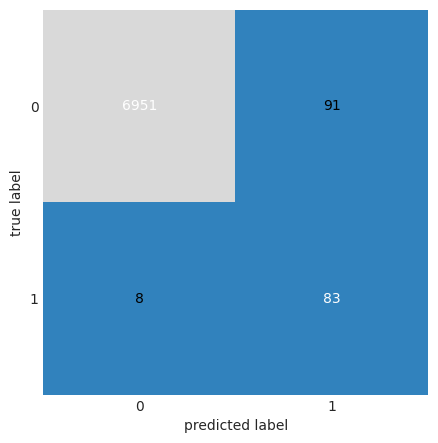

In [ ]:
plot_conf_matrix(ridge_over_pipe_br,X_test,Y_test)

In [ ]:
print("Trening dataset:\n")
print_metrics_tresholds(X_train,Y_train,ridge_over_pipe_br)
print("Test dataset:\n")
print_metrics_tresholds(X_test,Y_test,ridge_over_pipe_br)

Trening dataset:

     precision_score  recall_score  accuracy_score  f1_score
0.1         0.312597      0.952607        0.972840  0.470726
0.2         0.372659      0.943128        0.979149  0.534228
0.3         0.419831      0.943128        0.982754  0.581022
0.4         0.468235      0.943128        0.985699  0.625786
0.5         0.514360      0.933649        0.987982  0.663300
0.6         0.552408      0.924171        0.989545  0.691489
0.7         0.598765      0.919431        0.991167  0.725234
0.8         0.654237      0.914692        0.992789  0.762846
0.9         0.708487      0.909953        0.994111  0.796680
Test dataset:

     precision_score  recall_score  accuracy_score  f1_score
0.1         0.301818      0.912088        0.971961  0.453552
0.2         0.359307      0.912088        0.978130  0.515528
0.3         0.400966      0.912088        0.981494  0.557047
0.4         0.439153      0.912088        0.984018  0.592857
0.5         0.477011      0.912088        0.986121  

Even better results then SMOTE oversampling

Let's do another one SMOTEENN.

f1 is 51.71% +/- 3.03%



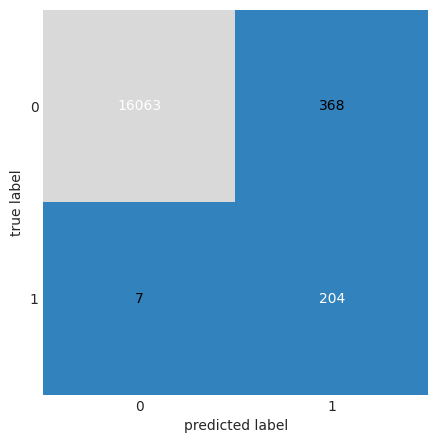

In [ ]:
ridge_over_pipe_en=Pipeline(steps=[("col_trans",col_trans),("smote",SMOTEENN(random_state=69)),("scaler",StandardScaler()),("ridge",ridge)])
ridge_over_pipe_en.fit( X_train, Y_train.values.ravel())

results_lg = cross_val_score(ridge_over_pipe_en, X_train, Y_train.values.ravel(), cv=10, scoring='f1',error_score="raise")
print(f'f1 is {round(np.mean(results_lg) * 100, 2)}% +/- {round(np.std(results_lg)*100, 2)}%\n')

plot_conf_matrix(ridge_over_pipe_en,X_train,Y_train)

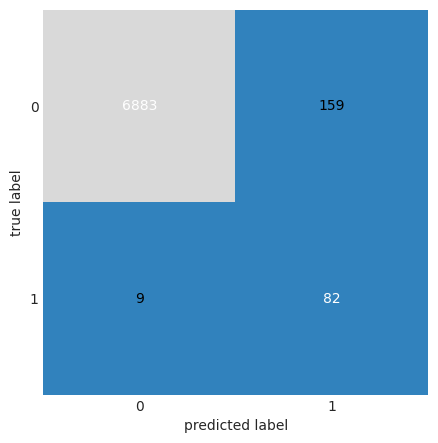

In [ ]:
plot_conf_matrix(ridge_over_pipe_en,X_test,Y_test)

In [ ]:
print("Trening Dataset:\n")
print_metrics_tresholds(X_train,Y_train,ridge_over_pipe_en)
print("Test Dataset:\n")
print_metrics_tresholds(X_test,Y_test,ridge_over_pipe_en)


Trening Dataset:

     precision_score  recall_score  accuracy_score  f1_score
0.1         0.148678      0.985782        0.928254  0.258385
0.2         0.211382      0.985782        0.953191  0.348117
0.3         0.268387      0.985782        0.965749  0.421907
0.4         0.314024      0.976303        0.972660  0.475202
0.5         0.356643      0.966825        0.977467  0.521073
0.6         0.413442      0.962085        0.982214  0.578348
0.7         0.476415      0.957346        0.986119  0.636220
0.8         0.546961      0.938389        0.989364  0.691099
0.9         0.678445      0.909953        0.993390  0.777328
Test Dataset:

     precision_score  recall_score  accuracy_score  f1_score
0.1         0.142157      0.956044        0.925838  0.247511
0.2         0.206897      0.923077        0.953876  0.338028
0.3         0.253776      0.923077        0.964391  0.398104
0.4         0.293907      0.901099        0.971120  0.443243
0.5         0.340249      0.901099        0.976447  

### ROC curve metrics

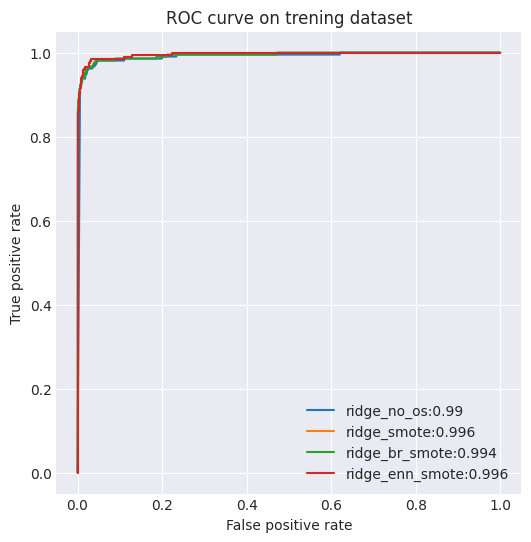

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(model_names,models,X,y,title):
  
  roc_scores=[]
  plt.figure(figsize=(6,6))
  for model in models:
    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
    roc_scores.append(roc_auc_score(y,model.predict_proba(X)[:, 1]))
    plt.plot(fpr, tpr)

  plt.legend([f"{name}:{roc:.3}" for name,roc in zip(model_names,roc_scores)])
  plt.xlabel("False positive rate")
  plt.ylabel("True positive rate")
  plt.title(title)

models=[ridge_pipe,ridge_over_pipe,ridge_over_pipe_br,ridge_over_pipe_en]
model_names=["ridge_no_os","ridge_smote","ridge_br_smote","ridge_enn_smote"]

plot_roc_curve(model_names,models,X_train,Y_train,"ROC curve on trening dataset")

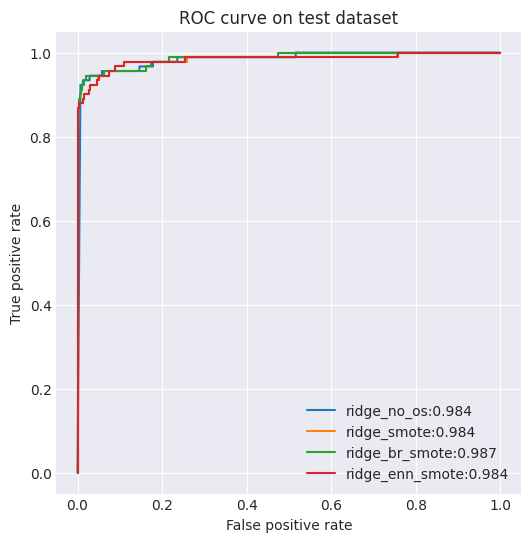

In [ ]:
plot_roc_curve(model_names,models,X_test,Y_test,"ROC curve on test dataset")

## RandomForestClassifier

In [ ]:
models=[]
evaluations=[]
def append_evals(model,X,y,evals):
  y_hat=model.predict(X)
  f1=f1_score(y,y_hat)
  evals.append(f1)
  recall=recall_score(y,y_hat)
  evals.append(recall)
  precision=precision_score(y,y_hat)
  evals.append(precision)
  accuracy=accuracy_score(y,y_hat)
  evals.append(accuracy)


### Without Oversamplling

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters={"rf__n_estimators":[100,140,170,200],
        'rf__min_samples_leaf':[5,10,15,20],
        "rf__max_depth":[7,10,15], 
        "rf__criterion":['gini',"entropy", "log_loss"]}

rf=RandomForestClassifier(n_jobs=-1,)


col_trans_rf=ColumnTransformer(transformers=[("one_hot",OneHotEncoder(handle_unknown='ignore',drop="first"),cat_col)]
                             ,remainder="passthrough")
rf_pipe=Pipeline(steps=[("col_trans_rf",col_trans_rf),("rf",rf)])

rf_no_smote=GridSearchCV(rf_pipe,parameters,cv=10,n_jobs=-1,scoring=["f1","recall","precision","accuracy"],verbose=0,refit="recall")

rf_no_smote.fit(X_train,Y_train)


Confusion matrix on Train Dataset


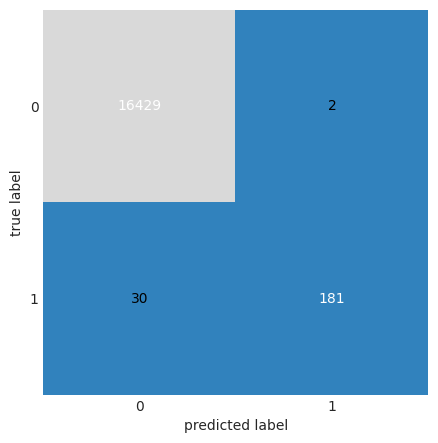

In [ ]:
import joblib
rf_no_smote=joblib.load(dir+"rf_model_no_smote.pkl")
models.append(rf_no_smote)
#joblib.dump(rf_no_smote,dir+"rf_model_no_smote.pkl")
append_evals(rf_no_smote,X_train,Y_train,evaluations)
print("Confusion matrix on Train Dataset")
plot_conf_matrix(rf_no_smote,X_train,Y_train)

Confusion matrix on Train Dataset


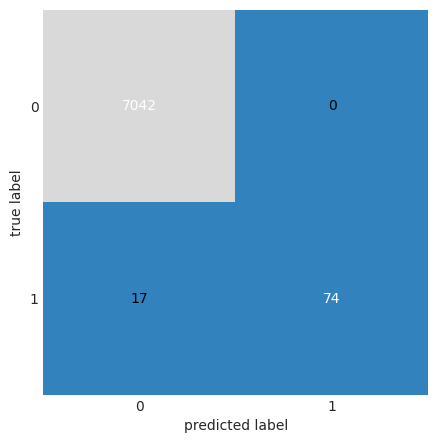

In [ ]:
append_evals(rf_no_smote,X_test,Y_test,evaluations)

print("Confusion matrix on Train Dataset")
plot_conf_matrix(rf_no_smote,X_test,Y_test)

### With Oversampling

In [ ]:
parameters={"rf__n_estimators":[100,140,170,200],
        'rf__min_samples_leaf':[5,10,15,20],
        "rf__max_depth":[7,10,15]}

rf=RandomForestClassifier(n_jobs=-1,)


col_trans_rf=ColumnTransformer(transformers=[("one_hot",OneHotEncoder(handle_unknown='ignore',drop="first"),cat_col)]
                             ,remainder="passthrough")
rf_pipe=Pipeline(steps=[("col_trans_rf",col_trans_rf),("smote",SMOTEENN(random_state=69)),("rf",rf)])

rf_een=GridSearchCV(rf_pipe,parameters,cv=10,n_jobs=-1,scoring=["f1","recall","precision","accuracy"],verbose=0,refit="f1")

rf_een.fit(X_train,Y_train)


/usr/local/lib/python3.9/dist-packages/imblearn/pipeline.py:297: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Confusion matrix on Train Dataset


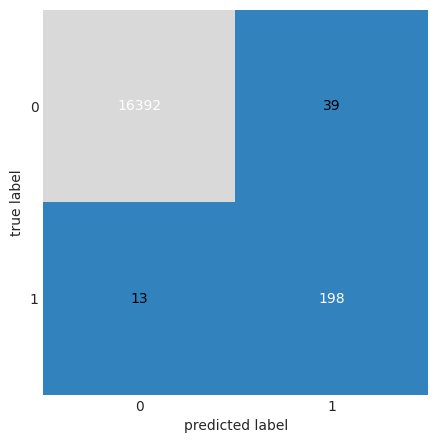

In [ ]:
rf_een=joblib.load(dir+"rf_een.pkl")
models.append(rf_een)
#joblib.dump(rf_een,dir+"rf_een.pkl")
append_evals(rf_een,X_train,Y_train,evaluations)
print("Confusion matrix on Train Dataset")
plot_conf_matrix(rf_een,X_train,Y_train)

Confusion matrix on Train Dataset


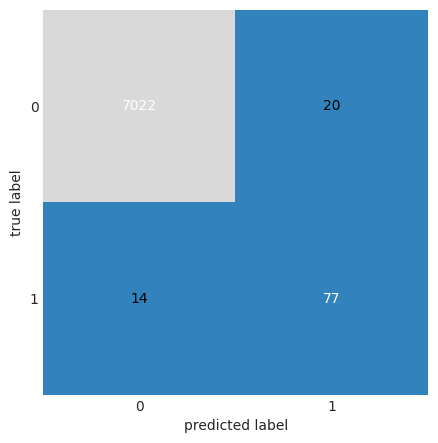

In [ ]:
append_evals(rf_een,X_test,Y_test,evaluations)

print("Confusion matrix on Train Dataset")
plot_conf_matrix(rf_een,X_test,Y_test)

## XGBClassifier

### Without Oversampling

In [ ]:
from xgboost import XGBClassifier


parameters={"xgb__n_estimators":[70,120],'xgb__reg_lambda':[2,1],
        'xgb__min_child_samples':[5,10,15],
        "xgb__max_depth":[7,11]}

xgb=XGBClassifier()

col_trans_xgb=ColumnTransformer(transformers=[("one_hot",OneHotEncoder(handle_unknown='ignore',drop="first"),cat_col)]
                             ,remainder="passthrough")

xgb_pipe=Pipeline(steps=[("col_trans_xgb",col_trans_xgb),("xgb",xgb)])

xgb_no_smote=GridSearchCV(xgb_pipe,parameters,cv=10,n_jobs=-1,scoring=["f1","recall","precision","accuracy"],verbose=0,refit="f1")

xgb_no_smote.fit(X_train,Y_train)


Confusion matrix on Train Dataset


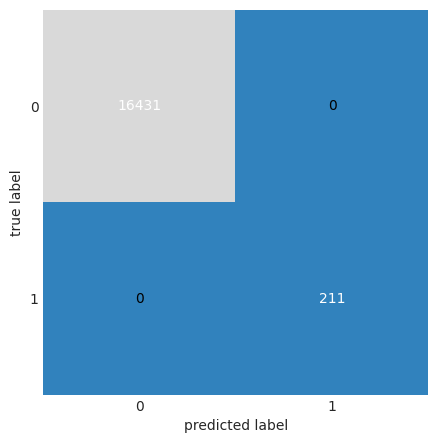

In [ ]:
#joblib.dump(xgb_no_smote,dir+"xgb_no_smote.pkl")
xgb_no_smote=joblib.load(dir+"xgb_no_smote.pkl")

models.append(xgb_no_smote)
append_evals(xgb_no_smote,X_train,Y_train,evaluations)
print("Confusion matrix on Train Dataset")
plot_conf_matrix(xgb_no_smote,X_train,Y_train)

Confusion matrix on Train Dataset


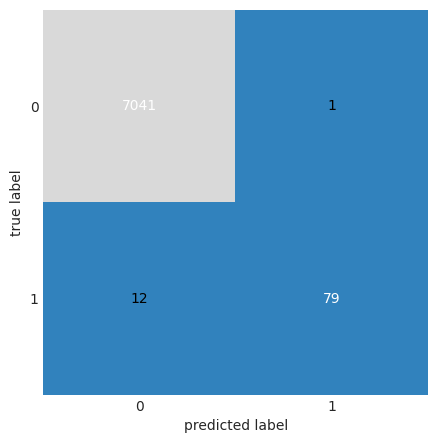

In [ ]:
append_evals(xgb_no_smote,X_test,Y_test,evaluations)
print("Confusion matrix on Train Dataset")
plot_conf_matrix(xgb_no_smote,X_test,Y_test)

### With Oversampling

Unfortunately it take quite a long time to train xgb and lgb model on oversampling dataset. I was time restricted so I gave up in this attempt.

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

parameters={"xgb__n_estimators":[70,120],'xgb__reg_lambda':[1],
        'xgb__min_child_samples':[10,15],
        "xgb__max_depth":[7,11]}

xgb_een=XGBClassifier()

col_trans_xgb=ColumnTransformer(transformers=[("one_hot",OneHotEncoder(handle_unknown='ignore',drop="first"),cat_col)]
                             ,remainder="passthrough")

xgb_pipe=Pipeline(steps=[("col_trans_xgb",col_trans_xgb),("smote",SMOTEENN(random_state=69)),("xgb",xgb_een)])

xgb_een=GridSearchCV(xgb_pipe,parameters,cv=10,n_jobs=-1,scoring=["f1","recall","precision","accuracy"],verbose=0,refit="f1")

xgb_een.fit(X_train,Y_train)


In [ ]:
joblib.dump(xgb_een,dir+"xgb_een.pkl")
#xgb_een=joblib.load(dir+"xgb_een.pkl")
models.append(xgb_een)
append_evals(xgb_een,X_train,Y_train,evaluations)
print("Confusion matrix on Train Dataset")
plot_conf_matrix(xgb_een,X_train,Y_train)

In [ ]:
append_evals(xgb_een,X_test,Y_test,evaluations)
print("Confusion matrix on Train Dataset")
plot_conf_matrix(xgb_een,X_test,Y_test)

## LGBCLassifier

### Without Oversampling

In [ ]:
from lightgbm import LGBMClassifier

parameters={"lgbm__n_estimators":[70,120],'lgbm__reg_lambda':[1],
        'lgbm__min_child_samples':[10,15],
        "lgbm__max_depth":[7,11]}

lgbm=LGBMClassifier()

col_trans_lgbm=ColumnTransformer(transformers=[("one_hot",OneHotEncoder(handle_unknown='ignore',drop="first"),cat_col)]
                             ,remainder="passthrough")

lgbm_pipe=Pipeline(steps=[("col_trans_lgbm",col_trans_lgbm),("lgbm",lgbm)])

lgbm_no_smote=GridSearchCV(lgbm_pipe,parameters,cv=10,n_jobs=-1,scoring=["f1","recall","precision","accuracy"],verbose=0,refit="f1")

lgbm_no_smote.fit(X_train,Y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('col_trans_lgbm',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['MARTIAL_STATUS',
                                                                          'EDUCATION',
                                                                          'EMPLOYMENT',
                                                                          'GENDER',
                                                                          'YEARS_ON_CURRENT_JOB'])])),
                                       ('lgbm', LGBMClassifier())]),
             n_jobs=-1,
             param_grid={'lgbm__max_depth': [7, 11],
                         'lgbm__min_child_samples': [10, 15],
                         'lgbm__n_estimators': [70, 120],
                         'lgbm__reg_lambda': [1]},
             refit='f1', scoring=['f1', 'recall', 'precision', 'accuracy'])

Confusion matrix on Train Dataset


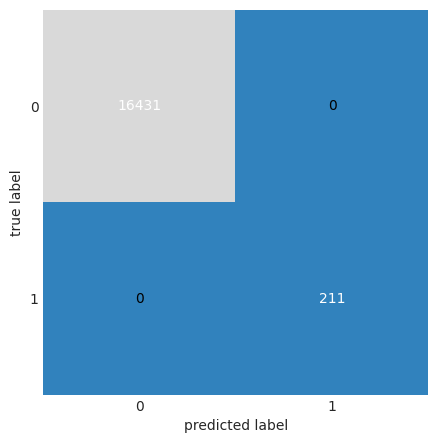

In [ ]:
#joblib.dump(lgbm_no_smote,dir+"lgbm_no_smote.pkl")
lgbm_no_smote=joblib.load(dir+"lgbm_no_smote.pkl")

models.append(lgbm_no_smote)
append_evals(lgbm_no_smote,X_train,Y_train,evaluations)
print("Confusion matrix on Train Dataset")
plot_conf_matrix(lgbm_no_smote,X_train,Y_train)

Confusion matrix on Train Dataset


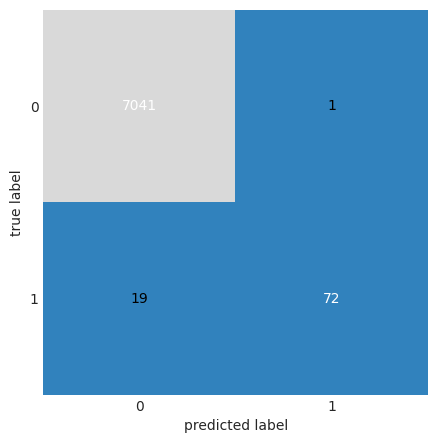

In [ ]:
append_evals(lgbm_no_smote,X_test,Y_test,evaluations)
print("Confusion matrix on Train Dataset")
plot_conf_matrix(lgbm_no_smote,X_test,Y_test)

### With Oversampling

In [ ]:
parameters={"lgbm__n_estimators":[70,120],'lgbm__reg_lambda':[1],
        'lgbm__min_child_samples':[10,15],
        "lgbm__max_depth":[7,11]}

lgbm=LGBMClassifier()

col_trans_lgbm=ColumnTransformer(transformers=[("one_hot",OneHotEncoder(handle_unknown='ignore',drop="first"),cat_col)]
                             ,remainder="passthrough")

lgbm_pipe=Pipeline(steps=[("col_trans_lgbm",col_trans_lgbm),("smote",SMOTEENN(random_state=69)),("lgbm",lgbm)])

lgbm_een=GridSearchCV(lgbm_pipe,parameters,cv=10,n_jobs=-1,scoring=["f1","recall","precision","accuracy"],verbose=0,refit="f1")

lgbm_een.fit(X_train,Y_train)

models.append(lgbm_een)

In [ ]:
joblib.dump(lgbm_een,dir+"lgbm_een.pkl")
#lgbm_een=joblib.load(dir+"lgbm_een.pkl")
[evaluations.append(eval) for key,eval in lgbm_een.scorer_.items()]
print("Confusion matrix on Train Dataset")
plot_conf_matrix(lgbm_een,X_train,Y_train)

In [ ]:
append_evals(lgbm_een,X_test,Y_test,evaluations)
print("Confusion matrix on Train Dataset")
plot_conf_matrix(lgbm_een,X_test,Y_test)

## Model Evaluations 

In [ ]:
data=np.array(evaluations)
data.resize(4,8)

model_names= ["RF_NO_SMOTE","RF_SMOTEENN","XGB_NO_SMOTE","LGBM_NO_SMOTE"]
df_eval=pd.DataFrame(index=model_names, columns=["f1_train","recall_train","precision_train","accuracy_train",
                                                 "f1_test","recall_test","precision_test","accuracy_test"],
                     data=data)
df_eval

f1_train  recall_train  precision_train  accuracy_train  \
RF_NO_SMOTE    0.918782      0.857820         0.989071        0.998077   
RF_SMOTEENN    0.883929      0.938389         0.835443        0.996875   
XGB_NO_SMOTE   1.000000      1.000000         1.000000        1.000000   
LGBM_NO_SMOTE  1.000000      1.000000         1.000000        1.000000   

                f1_test  recall_test  precision_test  accuracy_test  
RF_NO_SMOTE    0.896970     0.813187        1.000000       0.997617  
RF_SMOTEENN    0.819149     0.846154        0.793814       0.995233  
XGB_NO_SMOTE   0.923977     0.868132        0.987500       0.998177  
LGBM_NO_SMOTE  0.878049     0.791209        0.986301       0.997196

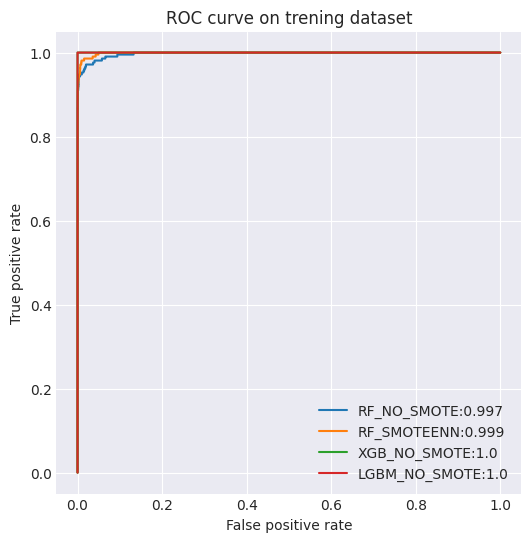

In [ ]:
plot_roc_curve(model_names,models,X_train,Y_train,"ROC curve on trening dataset")

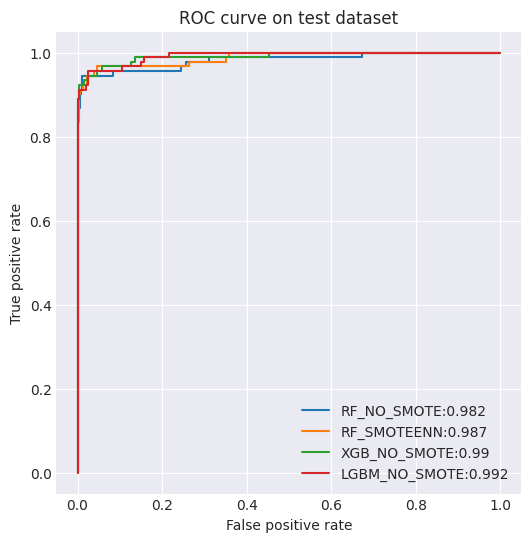

In [ ]:
plot_roc_curve(model_names,models,X_test,Y_test,"ROC curve on test dataset")

## Feature importances

In [ ]:
models.append(ridge_pipe)
models.append(ridge_over_pipe_en)

In [ ]:
def plot_feature_importance(models,model_names,port):
    app = JupyterDash(__name__)

    app.layout=html.Div([
        html.Div([dcc.Dropdown(
                  id="dropdown1",
                  options=model_names,
                  value='RF_NO_SMOTE',
                  clearable=False,
                  searchable=True,)],
                 style={'width': '48%', 'display': 'inline-block'}),
                  html.Div([dcc.Graph(id="graph_model_importance")])
                  ])

    @app.callback(
        Output("graph_model_importance","figure"),
        Input("dropdown1","value"))
    def update_graphs(model_name):
      model_to_show=None
      if model_name=="RF_NO_SMOTE":
        model_to_show=models[0]
        columns=model_to_show.best_estimator_.named_steps[f'col_trans_rf'].get_feature_names_out()
        estimator="rf"
        feature_importance=model_to_show.best_estimator_.named_steps[estimator].feature_importances_
      elif model_name=="RF_SMOTEENN":
         model_to_show=models[1]
         columns=model_to_show.best_estimator_.named_steps[f'col_trans_rf'].get_feature_names_out()
         estimator="rf"
         feature_importance=model_to_show.best_estimator_.named_steps[estimator].feature_importances_
      elif model_name=="XGB_NO_SMOTE":
        model_to_show=models[2]
        columns=model_to_show.best_estimator_.named_steps[f'col_trans_xgb'].get_feature_names_out()
        estimator="xgb"
        feature_importance=model_to_show.best_estimator_.named_steps[estimator].feature_importances_
      elif model_name=="LGBM_NO_SMOTE":
        model_to_show=models[3]
        estimator="lgbm"
        columns=model_to_show.best_estimator_.named_steps[f'col_trans_lgbm'].get_feature_names_out()
        feature_importance=model_to_show.best_estimator_.named_steps[estimator].feature_importances_
      elif model_name=="RIDGE_NO_SMOTE":
        model_to_show=models[4]
        columns=model_to_show.named_steps[f'col_trans'].get_feature_names_out()
        estimator="ridge"
        feature_importance=model_to_show.named_steps[estimator].coef_.ravel()
      elif model_name=="RIDGE_SMOTEENN":
        model_to_show=models[5]
        columns=model_to_show.named_steps[f'col_trans'].get_feature_names_out()
        estimator="ridge"
        feature_importance=model_to_show.named_steps[estimator].coef_.ravel()
    
        
      a=pd.DataFrame({"features":columns,"feature_importance":feature_importance})
      fig1=px.bar(a,x="feature_importance",y="features",color="features",title=f"{model_name} model feature importance")
      return fig1

    app.run_server(debug=True,mode='inline',host="0.0.0.0",port=port)

In [ ]:
model_names=["RF_NO_SMOTE","RF_SMOTEENN","XGB_NO_SMOTE","LGBM_NO_SMOTE","RIDGE_NO_SMOTE","RIDGE_SMOTEENN"]

In [ ]:
plot_feature_importance(models,model_names,5005)

Dash is running on http://0.0.0.0:5005/



INFO:dash.dash:Dash is running on http://0.0.0.0:5005/



<IPython.core.display.Javascript object>

# Potential Customers

## Prepering potential customers dataset for prediction

In [ ]:
df_potential_customers= pd.read_csv(dir+"Potential Customers.csv",sep=";",parse_dates=['CURRENT_ADDRESS_DATE','CURRENT_JOB_DATE','CURRENT_WITH_BANK_DATE'],infer_datetime_format=True)
df_potential_customers.head()

Cocunut  AGE  YEARS_WITH_BANK MARTIAL_STATUS EDUCATION EMPLOYMENT GENDER  \
0    80001   32                3              M       HGH        PVE      M   
1    80002   51               10              W       SEC        RET      F   
2    80003   36                7              M       BCR        STE      F   
3    80004   46               11              D       BCR        TEA      F   
4    80005   39               10              M       HGH        PVE      M   

   CUST_INCOME CURRENT_ADDRESS_DATE CURRENT_JOB_DATE CURRENT_WITH_BANK_DATE  \
0  423,0769231           1985-01-21       2005-01-01             2014-07-02   
1  140,6102308           2010-10-23       9999-10-01             2007-02-21   
2  326,9230769           1981-10-16       2009-09-10             2009-10-26   
3       738,82           2008-09-01       2005-11-01             2005-11-30   
4  483,9282308           1993-09-01       2013-06-01             2006-12-05   

  CURRENT_BALANCE_EUR  
0                 143  
1         2288,700154  
2         2268,491692  
3         4536,983462  
4         3076,923077

In [ ]:
comma_columns=['CUST_INCOME','CURRENT_BALANCE_EUR']
datetime_columns=['CURRENT_JOB_DATE','CURRENT_WITH_BANK_DATE','CURRENT_ADDRESS_DATE']
categorical_columns=list(set(df_potential_customers.columns)-set(comma_columns)-set(datetime_columns)-set(df_potential_customers.select_dtypes(include=np.number).columns))

df_potential_customers_pred=df_potential_customers.copy()
change_to_float(df_potential_customers_pred,comma_columns)
change_to_datetime(df_potential_customers_pred,datetime_columns)
chage_to_category(df_potential_customers_pred,categorical_columns)

df_potential_customers_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Cocunut                 2747 non-null   int64         
 1   AGE                     2747 non-null   int64         
 2   YEARS_WITH_BANK         2747 non-null   int64         
 3   MARTIAL_STATUS          2747 non-null   category      
 4   EDUCATION               2747 non-null   category      
 5   EMPLOYMENT              2747 non-null   category      
 6   GENDER                  2747 non-null   category      
 7   CUST_INCOME             2747 non-null   float64       
 8   CURRENT_ADDRESS_DATE    2686 non-null   datetime64[ns]
 9   CURRENT_JOB_DATE        2036 non-null   datetime64[ns]
 10  CURRENT_WITH_BANK_DATE  2747 non-null   datetime64[ns]
 11  CURRENT_BALANCE_EUR     2747 non-null   float64       
dtypes: category(4), datetime64[ns](3), float64(2), i

In [ ]:
assert(len(df_potential_customers_pred['Cocunut'].unique())==df_potential_customers_pred.shape[0])
df_potential_customers_pred.rename(columns={'Cocunut':"ID"},inplace=True)
df_potential_customers_pred.set_index("ID",inplace=True)

Since I don't know CURRENT DATE when this data is taken from database, I will be making a wild guess that will essentially impact results of our models. Since we have columns YEARS_IN_APARTMENT and YEARS_ON_CURRENT job that are iputs in our models.

My assumption is maybe one year later? 2018-7-3 or should we still take same year.

In [ ]:
current_date=datetime.datetime.strptime('2017-07-03','%Y-%m-%d') #Date when data is taken from DataBase

df_potential_customers_pred['DAYS_IN_APARTMENT']=df_potential_customers_pred['CURRENT_ADDRESS_DATE'].map(lambda x:current_date-x).dt.days
df_potential_customers_pred['DAYS_ON_CURRENT_JOB']=df_potential_customers_pred['CURRENT_JOB_DATE'].map(lambda x:current_date-x).dt.days
df_potential_customers_pred['YEARS_IN_APARTMENT']=round(df_potential_customers_pred['DAYS_IN_APARTMENT']/365,0)
df_potential_customers_pred['YEARS_ON_CURRENT_JOB']=round(df_potential_customers_pred['DAYS_ON_CURRENT_JOB']/365,0)

In [ ]:
df_potential_customers_pred.isna().sum()

AGE                         0
YEARS_WITH_BANK             0
MARTIAL_STATUS              0
EDUCATION                   0
EMPLOYMENT                  0
GENDER                      0
CUST_INCOME                 0
CURRENT_ADDRESS_DATE       61
CURRENT_JOB_DATE          711
CURRENT_WITH_BANK_DATE      0
CURRENT_BALANCE_EUR         0
DAYS_IN_APARTMENT          61
DAYS_ON_CURRENT_JOB       711
YEARS_IN_APARTMENT         61
YEARS_ON_CURRENT_JOB      711
dtype: int64

In [ ]:
df_potential_customers_pred.drop(index=df_potential_customers_pred.loc[df_potential_customers_pred['DAYS_IN_APARTMENT']<0,:].index,inplace=True)
df_potential_customers_pred.drop(columns=['CURRENT_ADDRESS_DATE','CURRENT_JOB_DATE','CURRENT_WITH_BANK_DATE',"DAYS_ON_CURRENT_JOB","DAYS_IN_APARTMENT"],inplace=True)

Function for YEARS_ON_CURRENT_JOB column discretization we only use transform not fit  

In [ ]:
df_potential_customers_pred=func.transform(df_potential_customers_pred)

In [ ]:
df_potential_customers_pred.isna().sum()

AGE                      0
YEARS_WITH_BANK          0
MARTIAL_STATUS           0
EDUCATION                0
EMPLOYMENT               0
GENDER                   0
CUST_INCOME              0
CURRENT_BALANCE_EUR      0
YEARS_IN_APARTMENT      61
YEARS_ON_CURRENT_JOB     0
dtype: int64

## Handle missing values

Lets impute values with RidgeRegression

In [ ]:
from sklearn.linear_model import Ridge

df_potential_customers_pred.YEARS_ON_CURRENT_JOB=df_potential_customers_pred.YEARS_ON_CURRENT_JOB.astype("str")

X_pot_train=df_potential_customers_pred.loc[df_potential_customers_pred.YEARS_IN_APARTMENT.notna()
,~df_potential_customers_pred.columns.isin(["YEARS_IN_APARTMENT"])]

Y_pot_train=df_potential_customers_pred.loc[df_potential_customers_pred.YEARS_IN_APARTMENT.notna(),['YEARS_IN_APARTMENT']]

X_pot_test=df_potential_customers_pred.loc[df_potential_customers_pred.YEARS_IN_APARTMENT.isna()
,~df_potential_customers_pred.columns.isin(["YEARS_IN_APARTMENT"])]


ridge_reg=Ridge()


col_trans=ColumnTransformer(transformers=[("one_hot",OneHotEncoder(handle_unknown='ignore',drop="first"),X_pot_train.select_dtypes(exclude="number").columns)]
                             ,remainder="passthrough")
ridge_pipe_reg=Pipeline(steps=[("col_trans",col_trans),("scaler",StandardScaler()),("ridge", ridge_reg)])

ridge_pipe_reg.fit(X_pot_train, Y_pot_train.values.ravel())

Y_pot_test=ridge_pipe_reg.predict(X_pot_test)

df_potential_customers_pred.loc[df_potential_customers_pred.YEARS_IN_APARTMENT.isna(),['YEARS_IN_APARTMENT']]=Y_pot_test

df_potential_customers_pred.isna().sum()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros



AGE                     0
YEARS_WITH_BANK         0
MARTIAL_STATUS          0
EDUCATION               0
EMPLOYMENT              0
GENDER                  0
CUST_INCOME             0
CURRENT_BALANCE_EUR     0
YEARS_IN_APARTMENT      0
YEARS_ON_CURRENT_JOB    0
dtype: int64

## Predictions

In [ ]:
df_potential_customers_pred["Mortgage_YN_RF_EEN"]=rf_een.predict(df_potential_customers_pred[X_train.columns])
df_potential_customers_pred["Mortgage_YN_RF_NO_SMOTE"]=rf_no_smote.predict(df_potential_customers_pred[X_train.columns])
df_potential_customers_pred["Mortgage_YN_XGB_NO_SMOTE"]=xgb_no_smote.predict(df_potential_customers_pred[X_train.columns])
df_potential_customers_pred['Mortgage_YN_LGM_NO_SMOTE']=lgbm_no_smote.predict(df_potential_customers_pred[X_train.columns])
df_potential_customers_pred['Mortgage_YN_RIDGE_EEN']=ridge_over_pipe_en.predict(df_potential_customers_pred[X_train.columns])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros



In [ ]:
df_potential_customers_pred["Mortgage_YN_RF_EEN_proba"]=rf_een.predict_proba(df_potential_customers_pred[X_train.columns])[:, 1]
df_potential_customers_pred["Mortgage_YN_RF_NO_SMOTE_proba"]=rf_no_smote.predict_proba(df_potential_customers_pred[X_train.columns])[:, 1]
df_potential_customers_pred["Mortgage_YN_XGB_NO_SMOTE_proba"]=xgb_no_smote.predict_proba(df_potential_customers_pred[X_train.columns])[:, 1]
df_potential_customers_pred['Mortgage_YN_LGM_NO_SMOTE_proba']=lgbm_no_smote.predict_proba(df_potential_customers_pred[X_train.columns])[:, 1]
df_potential_customers_pred['Mortgage_YN_RIDGE_EEN_proba']=ridge_over_pipe_en.predict_proba(df_potential_customers_pred[X_train.columns])[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros



## Prediction distributions

In [ ]:
print("Potential customers on random forest model with oversampling:\n")
print(df_potential_customers_pred["Mortgage_YN_RF_EEN"].value_counts())
print("\nPotential customers on random forest model without oversampling:\n")
print(df_potential_customers_pred["Mortgage_YN_RF_NO_SMOTE"].value_counts())
print("\nPotential customers on XBG model without oversampling:\n")
print(df_potential_customers_pred["Mortgage_YN_XGB_NO_SMOTE"].value_counts())
print("\nPotential customers on LGBM model without oversampling:\n")
print(df_potential_customers_pred["Mortgage_YN_LGM_NO_SMOTE"].value_counts())
print("\nPotential customers on RIDGE model with oversampling:\n")
print(df_potential_customers_pred["Mortgage_YN_RIDGE_EEN"].value_counts())

Potential customers on random forest model with oversampling:

0    2725
1      22
Name: Mortgage_YN_RF_EEN, dtype: int64

Potential customers on random forest model without oversampling:

0    2742
1       5
Name: Mortgage_YN_RF_NO_SMOTE, dtype: int64

Potential customers on XBG model without oversampling:

0    2738
1       9
Name: Mortgage_YN_XGB_NO_SMOTE, dtype: int64

Potential customers on LGBM model without oversampling:

0    2741
1       6
Name: Mortgage_YN_LGM_NO_SMOTE, dtype: int64

Potential customers on RIDGE model with oversampling:

0    2583
1     164
Name: Mortgage_YN_RIDGE_EEN, dtype: int64


In [ ]:
px.histogram(df_potential_customers_pred,x="Mortgage_YN_RF_EEN_proba",color='Mortgage_YN_RF_EEN')


In [ ]:
px.histogram(df_potential_customers_pred,x="Mortgage_YN_RF_NO_SMOTE_proba",color='Mortgage_YN_RF_NO_SMOTE')


In [ ]:
px.histogram(df_potential_customers_pred,x="Mortgage_YN_XGB_NO_SMOTE_proba",color='Mortgage_YN_XGB_NO_SMOTE')

In [ ]:
px.histogram(df_potential_customers_pred,x="Mortgage_YN_LGM_NO_SMOTE_proba",color='Mortgage_YN_LGM_NO_SMOTE')

In [ ]:
px.histogram(df_potential_customers_pred,x="Mortgage_YN_RIDGE_EEN_proba",color='Mortgage_YN_RIDGE_EEN')

# Conclusion

Seeing distributions above I would pick the most optimistic model Random forest model with oversampling technique. But with even less activation treshold. Let's say if there is a 30% or more probability that customer could apply for Mortgage that we should focus on them. We can't really aford to lose a potential customer even if we make a little mistake in our prediction. But we should expect a bit less to actually apply for Mortgage.

Let's see those customers and how many are they.

In [ ]:

df_potential_customers_pred['Potential_Mortgage']=df_potential_customers_pred["Mortgage_YN_RF_EEN_proba"].map(lambda x: "Y" if x>=0.3  else "N")
df_potential_customers_pred["Customer_ranking"]=df_potential_customers_pred.Mortgage_YN_RF_EEN_proba.map(lambda X:"Highest_probability" if  X>=0.8 
                                                                                                        else ( "High_probalility" if X>=0.6 else
                                                                                                              ("Average_probability" if X>=0.4 else
                                                                                                               ("Low_probability" if X>=0.3 else 
                                                                                                                ("Slim_chance" if X>=0.1 else "Not_a_chance")
                                                                                                                )
                                                                                                               )
                                                                                                              )
                                                                                                        )

In [ ]:
print(df_potential_customers_pred['Potential_Mortgage'].value_counts())
print("\nCustomer probability ranking numbers:")
print(df_potential_customers_pred['Customer_ranking'].value_counts())


N    2658
Y      89
Name: Potential_Mortgage, dtype: int64

Customer probability ranking numbers:
Not_a_chance           2513
Slim_chance             145
Low_probability          42
Average_probability      33
High_probalility         10
Highest_probability       4
Name: Customer_ranking, dtype: int64


In [ ]:
px.histogram(df_potential_customers_pred,x='Customer_ranking',color="Customer_ranking")

In [ ]:
px.pie(df_potential_customers_pred,names='Customer_ranking')

In [ ]:
df_potential_customers_pred.loc[df_potential_customers_pred['Potential_Mortgage']=="Y",list(X_train.columns)].describe()

AGE  YEARS_WITH_BANK  CUST_INCOME  CURRENT_BALANCE_EUR  \
count  89.000000        89.000000    89.000000            89.000000   
mean   45.044944         9.741573   769.129536          9731.086194   
std     9.987390         3.619794   542.319636          2839.067679   
min    23.000000         0.000000     0.000000          6153.846154   
25%    38.000000         8.000000   469.981308          7692.307692   
50%    43.000000        11.000000   601.261539          9230.769231   
75%    53.000000        12.000000   851.223000         10680.600920   
max    66.000000        15.000000  3053.984615         18176.994150   

       YEARS_IN_APARTMENT  
count           89.000000  
mean            18.424984  
std             11.728127  
min              1.000000  
25%             10.000000  
50%             16.823610  
75%             25.000000  
max             59.000000

In [ ]:
df_potential_customers_pred.loc[df_potential_customers_pred['Potential_Mortgage']=="Y",list(X_train.columns)]

AGE  YEARS_WITH_BANK MARTIAL_STATUS EDUCATION EMPLOYMENT GENDER  \
ID                                                                       
80023   35                0              S       MAS        TEA      M   
80040   45                8              M       BCR        STE      F   
80092   32               10              M       BCR        PVE      M   
80135   42               12              D       BCR        PVE      F   
80140   35               12              S       BCR        TEA      F   
...    ...              ...            ...       ...        ...    ...   
82621   39               12              M       HGH        STE      M   
82669   66                9              W       HGH        RET      M   
82686   45               11              S       BCR        STE      M   
82707   36                6              M       HGH        PVE      M   
82733   39               12              M       BCR        PVE      M   

       CUST_INCOME  CURRENT_BALANCE_EUR  YEARS_IN_APARTMENT  \
ID                                                            
80023   615.388231          7629.000615                35.0   
80040   681.276923          9484.615385                 7.0   
80092  2589.938462         10680.600920                 5.0   
80135   647.900000          7692.307692                17.0   
80140  1033.438462         12269.909310                35.0   
...            ...                  ...                 ...   
82621   602.846154          9615.384615                39.0   
82669  1490.189692         14923.750690                34.0   
82686   469.346154          6538.461538                12.0   
82707   505.986000          9168.461538                17.0   
82733   469.981308         13076.923080                15.0   

      YEARS_ON_CURRENT_JOB  
ID                          
80023                  0.0  
80040                  2.0  
80092                  1.0  
80135                  1.0  
80140                  0.0  
...                    ...  
82621                  1.0  
82669              missing  
82686                  1.0  
82707                  0.0  
82733                  1.0  

[89 rows x 10 columns]

In [ ]:
df_potential_customers["Mortgage_YN"]=df_potential_customers_pred['Potential_Mortgage']
df_potential_customers["Customer_ranking"]=df_potential_customers_pred['Potential_Mortgage']
df_potential_customers.to_csv(dir+"Potential_customers_results.csv")

# Additional Model Explanation

In [ ]:
!pip install shap


In [ ]:
import shap
shap.initjs()

In [ ]:
rf_een.best_estimator_.named_steps['rf']

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=170,
                       n_jobs=-1)

SHAP has TreeExpainer that is optimized for tree based models. Here we will focus on RandomForest trained on oversampling dataset.

We need to get feature names becouse shap does not get as an input pipeline, so we have to manually transform data.

In [ ]:
feature_names=rf_een.best_estimator_.named_steps['col_trans_rf'].get_feature_names_out()

Initializing TreeExplainer with RF model from pipeline

In [ ]:
explainer=shap.TreeExplainer(rf_een.best_estimator_.named_steps['rf'])

Trenasormed data from pipeline and shap values for that data.

In [ ]:
observations=rf_een.best_estimator_.named_steps['col_trans_rf'].transform(df_potential_customers_pred[X_train.columns])
shap_values=explainer.shap_values(observations)

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros


In [ ]:

shap.initjs()
shap.force_plot(explainer.expected_value[1],shap_values[1],features=observations,feature_names=feature_names,link='identity')

100%|===================| 5469/5494 [01:51<00:00]       No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


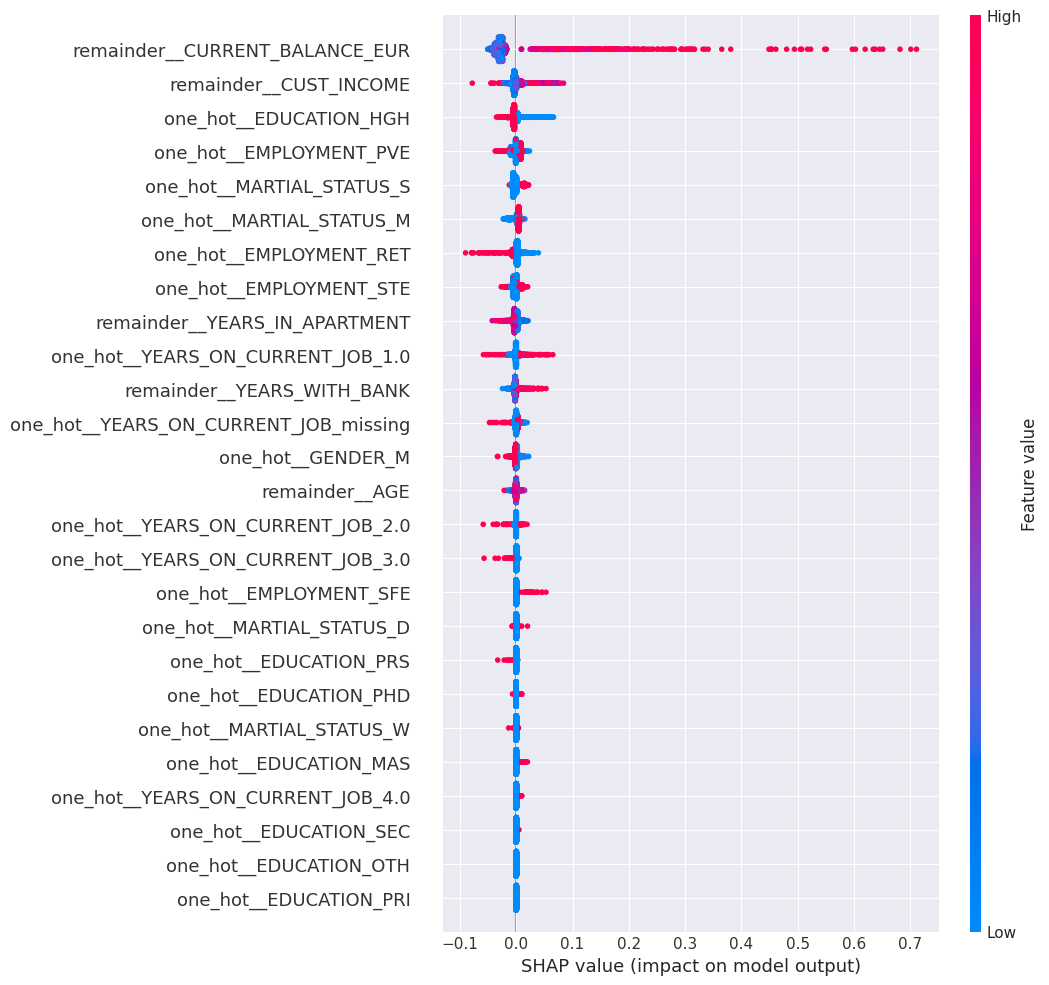

In [ ]:
explainer_bsw = shap.Explainer(rf_een.best_estimator_.named_steps['rf'], pd.DataFrame(data=observations,columns=feature_names))
shap_values_bsw = explainer_bsw(pd.DataFrame(data=observations,columns=feature_names))
shap.plots.beeswarm(shap_values_bsw[:,:,1],max_display=30)